<h3><center>M12/Project 3: Gradient Descent and Gradient Boosting
    <br>By Anna Imhoff, Randy Leon, and Jinming Chen</br></h3></center>

<h3><b>Introduction</b></h3>

   The Graduation Rate and Outcomes data used for this exercise can be found under the Graduate Rate Database section of the [NY State Education Department (NYSED)](https://data.nysed.gov/downloads.php). First, we will upload the data set to our Github repository.  The original data set contains 73,152 observations and 28 attributes.  Then, we will create a categorical response variable called "dropout_pct_level" that will contain low, medium, and high classifications from the "dropout_pct" attribute. These categories will be based on the percentage of students that discontinued their high school enrollment. Exploratory data analysis will be performed on the variables to familiarize us with the high school attrition attributes, identify trends and missing data, and gather preliminary predictive inferences. We will apply feature selection and/or dimensionality reduction techniques to identify the explanatory variables to be included in our decision tree, random forest, gradient boosting classifier, stochastic gradient descent classifier, and XG Boost classifier. We will find which model is the best at predicting which of the three new indicator values is most likely to apply to a given observation. 

<b>Data Set Attributes</b><br> 
1) report_school_year - Indicates school year for which high school graduation info is being reported (**categorical**) <br>
2) aggregation_index - Numeric code identifying manner in which high school graduation data has been aggregated (**categorical**) <br>
3) aggregation_type - Text description of how high school graduation data has been aggregated (**categorical**) <br>
4) nrc_code - Numeric code identifying "needs / resource capacity", which is an indicator of the type of school district (**categorical**) <br>
5) nrc_desc - Text description of the type of school district (**categorical**)<br>
6) county_code - Numeric code for county name (**categorical**) <br>
7) county_name - Full name of applicable NY State county (**categorical**) <br>
8) nyc_ind - Indicates whether or not the school district resides within the borders of NYC (**categorical**) <br>
9) membership_desc - Indicates school year in which students first enrolled in High School (**categorical**) <br>
10) subgroup_code - Numeric code identifying student subgrouping (**categorical**) <br>
11) subgroup_name - Text description of student subgrouping. Note that a student may belong to MORE THAN ONE subgrouping (e.g., "Female", "Hispanic", "Not English Language Learner", etc.) (**categorical**) <br>
&nbsp;&nbsp;   1 - All Students <br>
&nbsp;&nbsp;Female + Male = All Students 98% of the time in this data set.<br>
&nbsp;&nbsp;    2 - Female  <br>
&nbsp;&nbsp;   3 - Male <br>
&nbsp;&nbsp;    4 - American Indian/Alaska Native <br>
&nbsp;&nbsp;    5 - Black <br>
&nbsp;&nbsp;    6 - Hispanic  
&nbsp;&nbsp;    7 - Asian/Pacific Islander <br>
&nbsp;&nbsp;    8 - White <br> 
&nbsp;&nbsp;    9 - Multiracial<br>
&nbsp;&nbsp;    10 - General Education Students <br> 
&nbsp;&nbsp;    11 - Students with Disabilities <br> 
&nbsp;&nbsp;    12 - Not English Language Learner <br>
&nbsp;&nbsp;    13 - English Language Learner <br> 
&nbsp;&nbsp;    14 - Formerly English Language Learner <br>
&nbsp;&nbsp;    15 - Econmically Disadvantaged <br>
&nbsp;&nbsp;    16 - Not Economically Disadvantaged  <br>
&nbsp;&nbsp;    17 - Migrant <br>
&nbsp;&nbsp;    18 - Not Migrant <br>
&nbsp;&nbsp;   20 - Homeless <br>
&nbsp;&nbsp;    21 - Not Homeless <br>
&nbsp;&nbsp;    22 - In Foster Care <br>
&nbsp;&nbsp;    23 - Not in Foster Care <br>
&nbsp;&nbsp;    24 - Parent in Armed Forces <br>
&nbsp;&nbsp;    25 - Parent Not in Armed Forces <br>
12) enroll_cnt - How many students of the indicated subgrouping were enrolled during the given school year (**numeric, discrete**) <br>
The number is equal to local_cnt + reg_cnt + reg_adv_cnt + non_diploma_credential_cnt + still_enr_cnt + ged_cnt + dropout_cnt in 93% of the rows in the data set. <br>
13) grad_cnt - How many enrolled students of the indicated subgrouping graduated at the end of the given school year. <br> 
This number is equal to local_cnt + reg_cnt + reg_adv_cnt in 100% of the rows in the data set.(**numeric, discrete**) <br>
14) grad_pct - What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year (**numeric, continuous**) <br> 
15) local_cnt - How many enrolled students of the indicated subgrouping were awarded a "Local" diploma (**numeric, discrete**) <br>
16) local_pct - What percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma (**numeric, continuous**) <br>
17) reg_cnt - How many enrolled students of the indicated subgrouping were awarded a "Regents" diploma (**numeric, discrete**) <br>
18) reg_pct - What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma (**numeric, continuous**) <br>
19) reg_adv_cnt - How many enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma (**numeric, discrete**) <br>
20) reg_adv_pct - What percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma (**numeric, continuous**) <br>
21) non_diploma_credential_cnt - How many enrolled students of the indicated subgrouping achieved a non-diploma credential (**numeric, discrete**) <br>
22) non_diploma_credential_pct - What percentage of enrolled students of the indicated subgrouping achieved a non-diploma credential (**numeric, continuous**) <br>
23) still_enrolled_cnt - How many enrolled students of the indicated subgrouping did not graduate but were still_enrolled (**numeric, discrete**) <br>
24) still_enrolled_pct - What percentage of enrolled students of the indicated subgrouping did not graduate but were still_enrolled (**numeric, continuous**) <br>
25) ged_cnt - How many enrolled students of the indicated subgrouping were awarded a "GED" diploma (**numeric, discrete**) <br>
26) ged_pct - What percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma (**numeric, continuous**) <br>
27) dropout_cnt - How many enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year (**numeric, discrete**) <br>
28) dropout_pct -What percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year (**numeric, continuous**)

<h3><b>Exploratory Data Analysis</b></h3>

In [1]:
#Import libraries and packages
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Read in the csv from Github
df = pd.read_csv("https://raw.githubusercontent.com/annaimhoff/DAV-6150/main/Project1_Data.csv", sep=',')
                 
#View the data frame to ensure that the desired columns were selected
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%


Convert the "-" to NaN.

In [2]:
#Replace - values with numpy's NaN so that columns can be transformed to the appropriate data type
df = df.replace(to_replace = '-', value = np.nan) 

#Check results
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%


Remove the % signs from the data set.

In [3]:
#Source: https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

#Select columns that need to have the % sign removed
cols = ['grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct', 'still_enr_pct', 'ged_pct', 
        'dropout_pct']

#Remove with regex function
df[cols] = df[cols].replace({'\%': '', ',': ''}, regex=True)

#Check results
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14,16,2,30,5,0,0,148,22
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15,2,1,11,3,0,0,65,20
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13,14,4,19,6,0,0,83,25
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6,10,3,18,5,0,0,91,25


In [4]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  39674 non-null  object
 13  grad_cnt                    39674 non-null  ob

Transform enroll_cnt, grad_cnt, grad_pct, local_cnt, local_pct, reg_cnt, reg_pct, reg_adv_cnt, reg_adv_pct, non_diploma_credential_cnt, non_diploma_credential_pct, still_enr_cnt, still_enr_pct, ged_cnt, ged_pct, dropout_cnt, 
dropout_pct from object to numeric.

In [5]:
df[["enroll_cnt", "grad_cnt", "grad_pct", "local_cnt", "local_pct", "reg_cnt", "reg_pct", "reg_adv_cnt", "reg_adv_pct",
"non_diploma_credential_cnt", "non_diploma_credential_pct", "still_enr_cnt", "still_enr_pct", "ged_cnt", "ged_pct", 
"dropout_cnt", "dropout_pct"]] = df[["enroll_cnt", "grad_cnt", "grad_pct", "local_cnt", "local_pct", "reg_cnt", 
"reg_pct", "reg_adv_cnt", "reg_adv_pct", "non_diploma_credential_cnt", "non_diploma_credential_pct", "still_enr_cnt", 
"still_enr_pct", "ged_cnt", "ged_pct", "dropout_cnt", "dropout_pct"]].apply(pd.to_numeric)

#Check results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   report_school_year          73152 non-null  object 
 1   aggregation_index           73152 non-null  int64  
 2   aggregation_type            73152 non-null  object 
 3   aggregation_name            73152 non-null  object 
 4   nrc_code                    73152 non-null  int64  
 5   nrc_desc                    73152 non-null  object 
 6   county_code                 73152 non-null  int64  
 7   county_name                 73152 non-null  object 
 8   nyc_ind                     73152 non-null  int64  
 9   membership_desc             73152 non-null  object 
 10  subgroup_code               73152 non-null  int64  
 11  subgroup_name               73152 non-null  object 
 12  enroll_cnt                  39674 non-null  float64
 13  grad_cnt                    396

In [6]:
#Find the number of rows and columns in the data set.
df.shape

(73152, 29)

In [7]:
#Check the data set for null values
df.isnull().sum()

report_school_year                0
aggregation_index                 0
aggregation_type                  0
aggregation_name                  0
nrc_code                          0
nrc_desc                          0
county_code                       0
county_name                       0
nyc_ind                           0
membership_desc                   0
subgroup_code                     0
subgroup_name                     0
enroll_cnt                    33478
grad_cnt                      33478
grad_pct                      33478
local_cnt                     33478
local_pct                     33478
reg_cnt                       33478
reg_pct                       33478
reg_adv_cnt                   33478
reg_adv_pct                   33478
non_diploma_credential_cnt    33478
non_diploma_credential_pct    33478
still_enr_cnt                 33478
still_enr_pct                 33478
ged_cnt                       33478
ged_pct                       33478
dropout_cnt                 

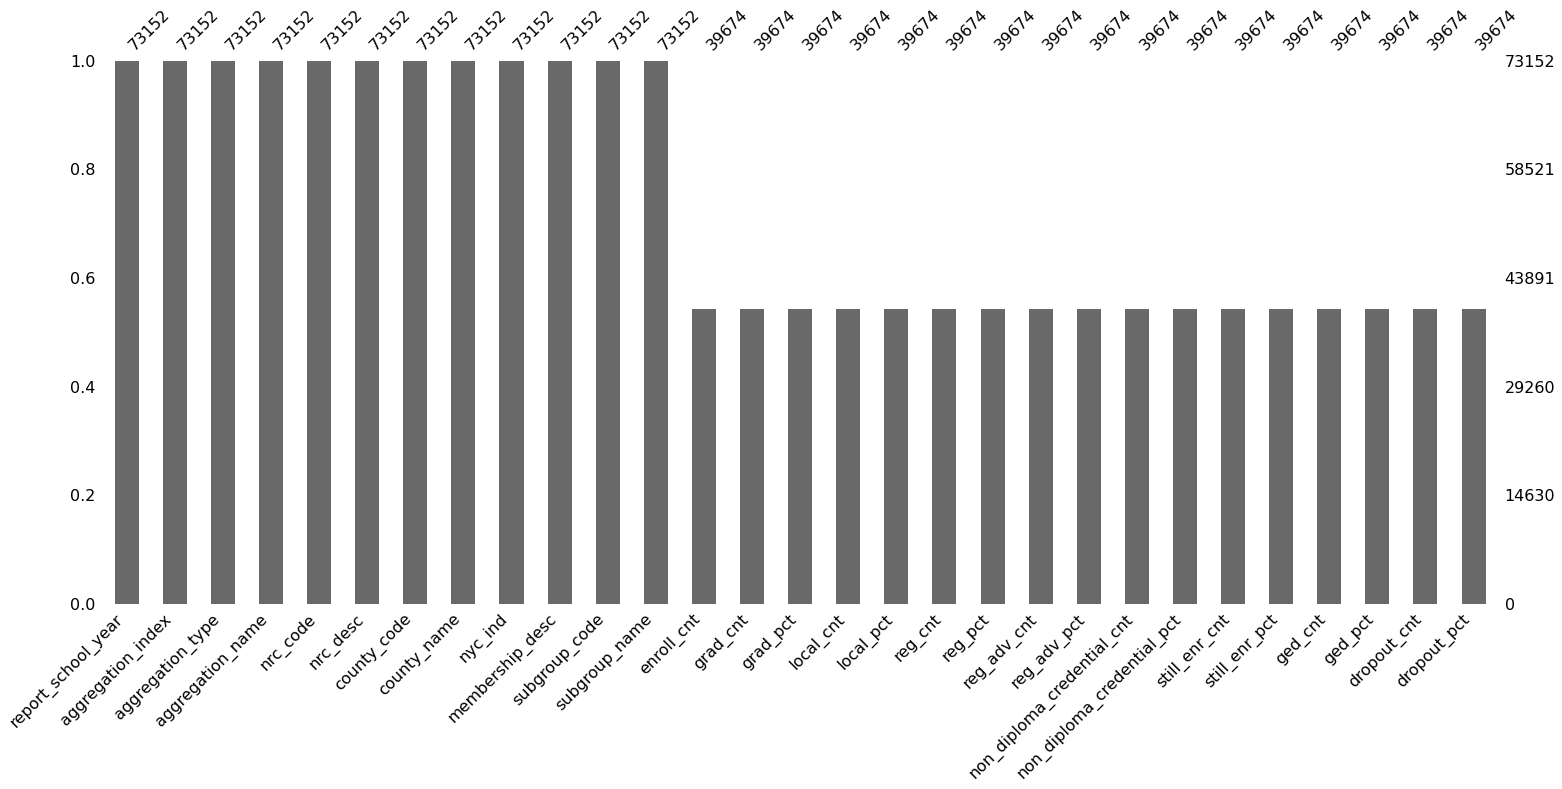

In [8]:
#Visualize the amount of missing data using missingno's bar chart
msno.bar(df);

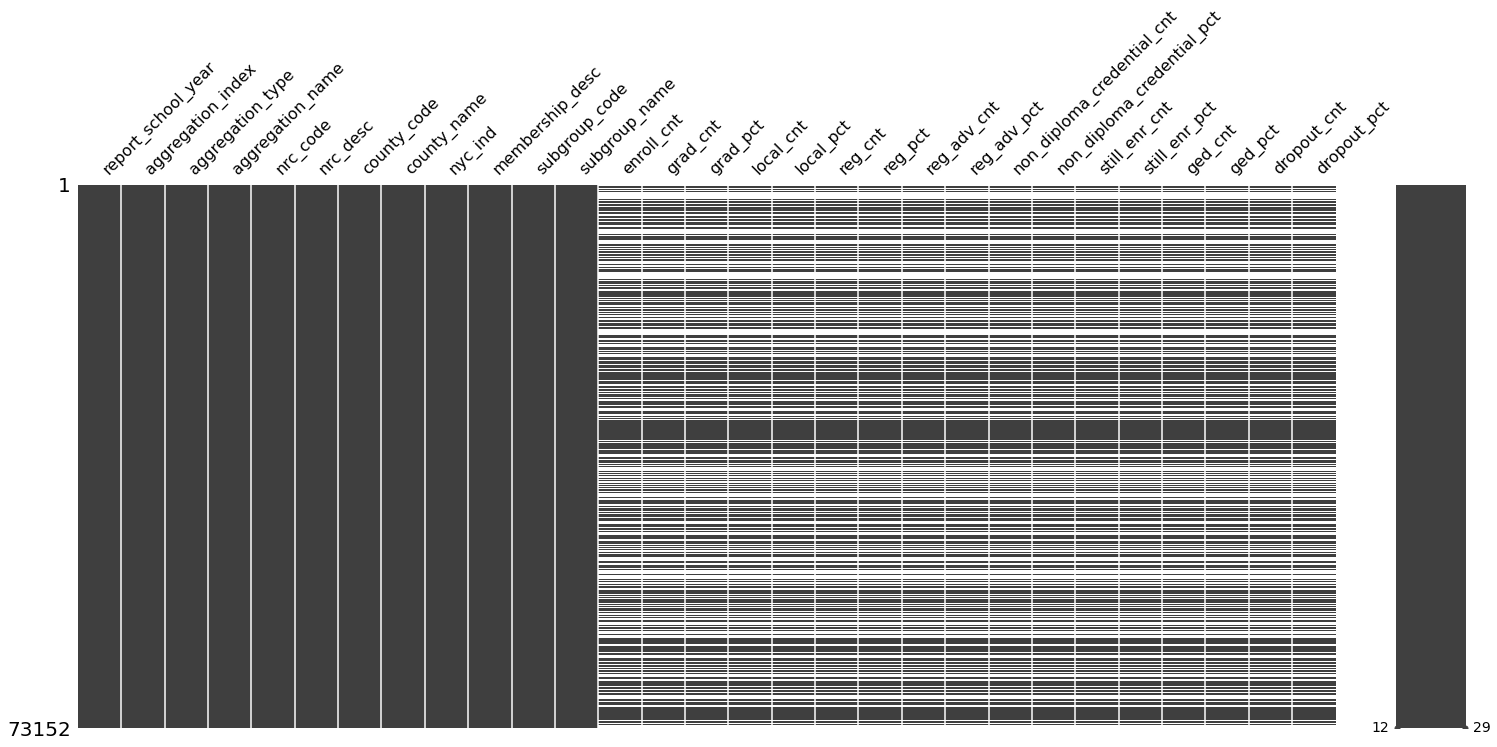

In [9]:
#Use missingnos matrix to see if there is a pattern to the missing data
ax = msno.matrix(df)
ax.get_figure();

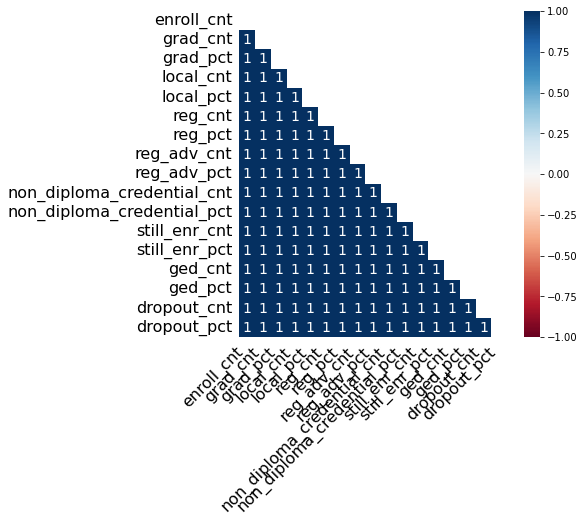

In [10]:
#Graph a heat map of the missing data to see if the locations where the data are missing are correlated.
ax = msno.heatmap(df, figsize = (6,6))
ax.get_figure(); 

We see that there is a pattern to our missing data.  Since the missing values are not random, we will drop all rows that have missing data instead of imputing the missing values.

In [11]:
#Get summary statistics for each numeric variable including mean, standard deviation, minimum, maximum, and quartiles
df.describe()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
count,73152.0,73152.000000,73152.000000,73152.000000,73152.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,...,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000
mean,3.0,4.588583,36.251859,0.055255,12.000930,192.120079,161.178354,84.406614,12.340903,8.479936,...,62.032742,32.577204,1.924485,1.742627,11.299516,5.190704,1.377577,0.612693,16.239225,7.963049
std,0.0,1.203507,20.588044,0.228479,7.213138,439.972474,361.294773,15.679500,32.046302,10.398486,...,132.777866,23.001197,6.498913,4.063987,40.766672,8.832710,4.949389,1.985445,50.129834,9.658698
min,3.0,1.000000,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0,4.000000,17.000000,0.000000,6.000000,25.000000,20.000000,79.000000,1.000000,2.000000,...,4.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.0,5.000000,40.000000,0.000000,11.000000,66.000000,57.000000,89.000000,4.000000,6.000000,...,18.000000,31.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,5.000000
75%,3.0,5.000000,57.000000,0.000000,18.000000,179.000000,156.000000,95.000000,10.000000,11.000000,...,62.000000,49.000000,2.000000,2.000000,5.000000,6.000000,1.000000,0.000000,9.000000,11.000000
max,3.0,6.000000,68.000000,1.000000,25.000000,9176.000000,7540.000000,100.000000,557.000000,100.000000,...,2231.000000,100.000000,279.000000,67.000000,1381.000000,100.000000,97.000000,67.000000,1091.000000,100.000000


Aggregation_index only has the value of 3.<br>
Categorical attributes include nrc_code, county_code, nyc_ind, and subgroup_code.<br> 
There are no negative values in the data set which is what we would expect. 

In [12]:
#Check for duplicates
df[df.duplicated()]

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct


There are no duplicate values.

Divide the data frame into two lists, one for categorical variables and the other for numeric, to look at the distributions of each of the attributes. 

In [13]:
#Create lists of numerical and categorical attributes

col_cat=['report_school_year', 'aggregation_index', 'aggregation_type', 'aggregation_name', 'nrc_code', 'nrc_desc', 
         'county_code', 'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code', 'subgroup_name']

col_num=['enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt', 'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
         'non_diploma_credential_cnt', 'non_diploma_credential_pct', 'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct',
         'dropout_cnt', 'dropout_pct']

print("# of categorical attributes:%s" %len(col_cat))
print("# of numeric attributes:%s" %len(col_num))

# of categorical attributes:12
# of numeric attributes:17


<h4><b>Bar Charts, Histograms and Boxplots</b></h4>

Plot a bar chart for each of the categorical attributes.

C:\Users\aimhoff\AppData\Local\Temp/ipykernel_18452/2920576949.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


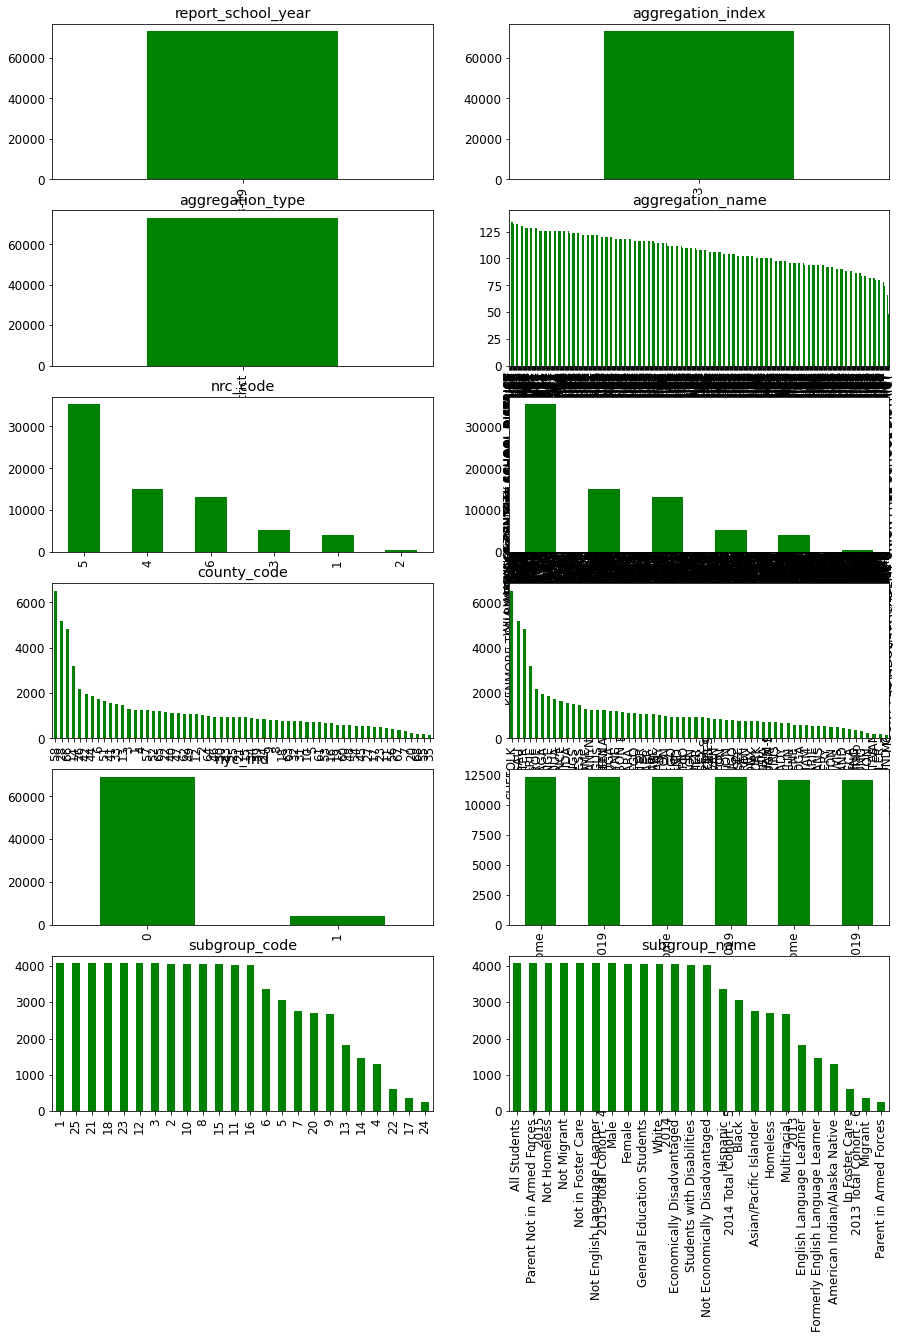

In [14]:
#Set plot parameters
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,20)}) 

#Use an index to identify the spot of the subplot
j=1

#For each categorical column 
for k in col_cat :   
    plt.subplot(6,2,j) 
    df[k].value_counts().plot(kind='bar', color='green');
    plt.title('%s' %k)
    
#Add 1 to go to the next subplot space
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

1) report_school_year only has one observation.<br>
2) aggregation_index only has one observation. <br>
3) aggregation_type only has one observation. <br>
4) The most common observation for aggregation_name is Kingston City School District. <br>
5) The most common observation for nrc_code is 5.<br>
6) The most common observation for nrc_desc is Average Needs. <br>
7) The most common observation for county_code is 58. <br>
8) The most common observation for county_name is Suffolk. <br>
9) The most common observation for nyc_ind is 0 which means not in NYC.<br>
10) The most common observations for membership_desc is 2015 Total Cohort - 4 Year Outcome - August 2019 and 2015 Total Cohort - 4 Year Outcome.<br>
11) The most common observations for subgroup_code is 1, 18, 21, 25.<br>
12) The most common observations for subgroup_name is All Students, Not Migrant, Not Homeless, and Parent Not in Armed Forces.<br>

Plot a histogram for each of our numerical attributes.

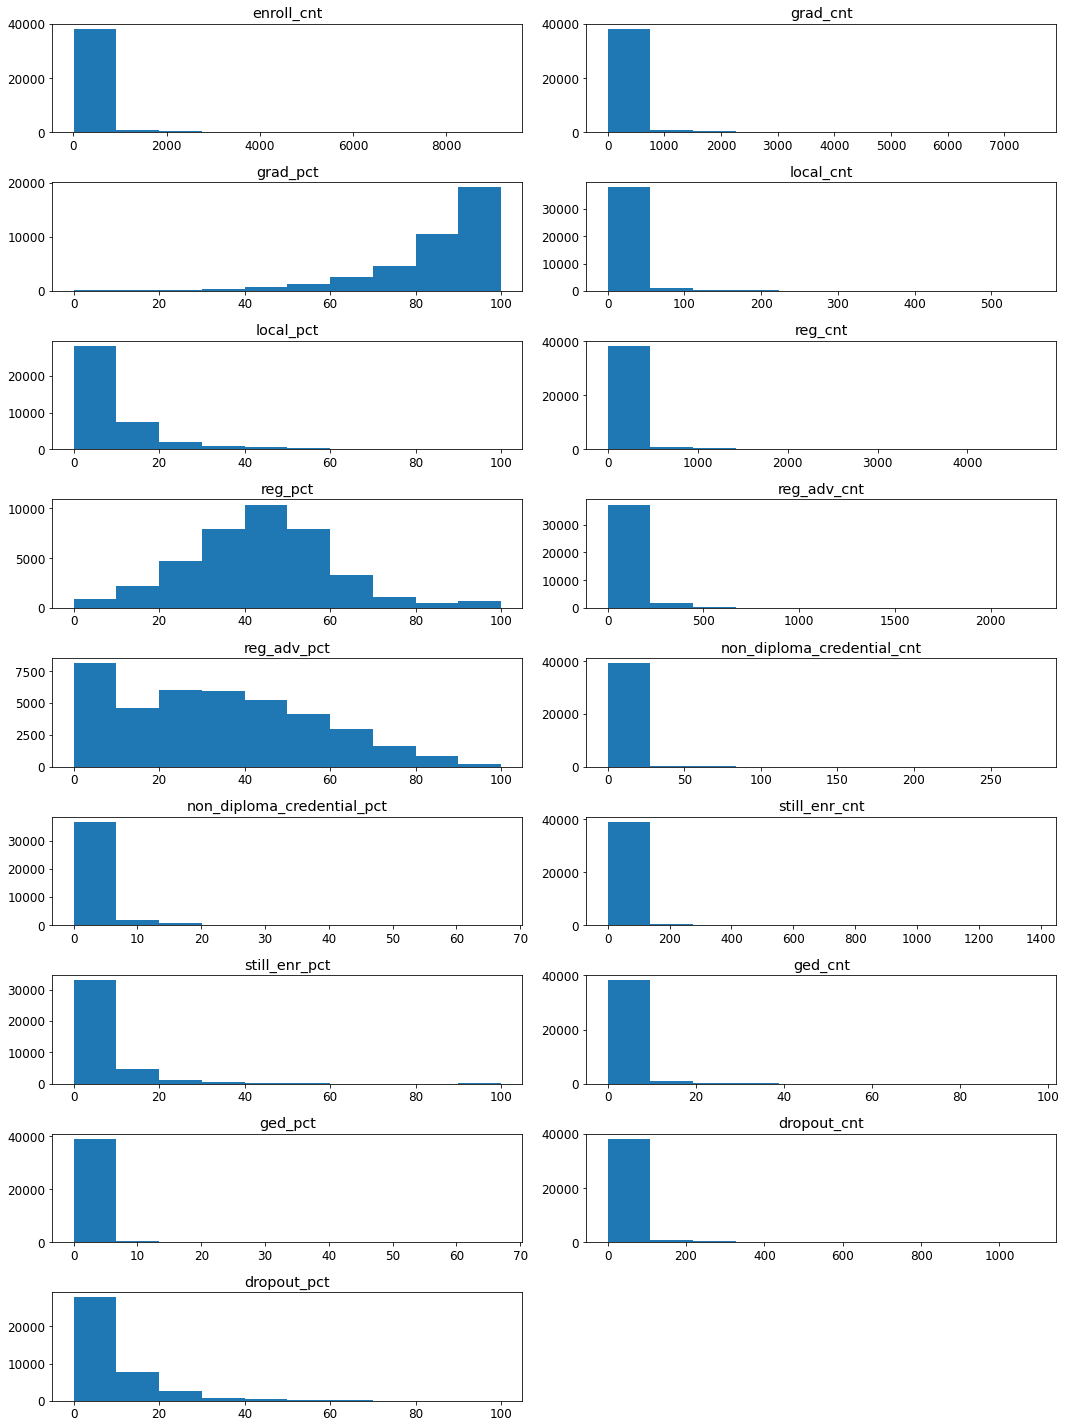

In [15]:
#Set plot parameters
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,20)}) 

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numerical column 
for k in col_num :   
    plt.subplot(9,2,j) 
    plt.hist(df[k])
    plt.title('%s' %k)
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

1) enroll_cnt is right-skewed. It has 1,464 unique values with a mode of 5, a median of 66, and a mean of 192.<br>
2) grad_cnt is right-skewed. It has 1,714 unique values with a mode of 5, a median of 57, and a mean of 161.<br>
3) grad_pct is left-skewed.  It has 100 unique values with a mode of 100, a median of 89, and a mean of 84. <br>
4) local_cnt is right-skewed. It has 332 unique values with a mode of 0, a median of 4, and a mean of 12.<br>
5) local_pct is right-skewed. It has 81 unique values with a mode of 0, a median of 6, and a mean of 8.<br>
6) reg_cnt is right-skewed. It has 1,290 unique values with a mode of 3, a median of 27, and a mean of 87.<br>
7) reg_pct is pretty evenly distributed. It has 102 unique values with a mode of 50, a median of 43, and a mean of 43.<br>
8) reg_adv_cnt is right-skewed. It has 782 unique values with a mode of 0, a median of 18, and a mean of 62.<br>
9) reg_adv_pct is right-skewed. It has 100 unique values with a mode of 0, a median of 31, and a mean of 33.<br>
10) non_diploma_credential_cnt is right-skewed. It has 76 unique values with a mode of 0, a median of 0, and a mean of 2.<br>
11) non_diploma_credential_pct is right-skewed. It has 47 unique values with a mode of 0, a median of 0, and a mean of 2.<br>
12) still_enr_cnt is right-skewed. It has 408 unique values with a mode of 0, a median of 2, and a mean of 11.<br>
13) still_enr_pct is right-skewed. It has 85 unique values with a mode of 0, a median of 2, and a mean of 5.<br>
14) ged_cnt is right-skewed. It has 78 unique values with a mode of 0, a median of 0, and a mean of 1.<br>
15) ged_pct is right-skewed. It has 32 unique values with a mode of 0, a median of 0, and a mean of 1.<br>
16) dropout_cnt is right-skewed. It has 445 unique values with a mode of 0, a median of 3, and a mean of 16.<br>
17) dropout_pct is right-skewed. It has 81 unique values with a mode of 0, a median of 5, and a mean of 8.<br>

We will now check the boxplots for outliers.

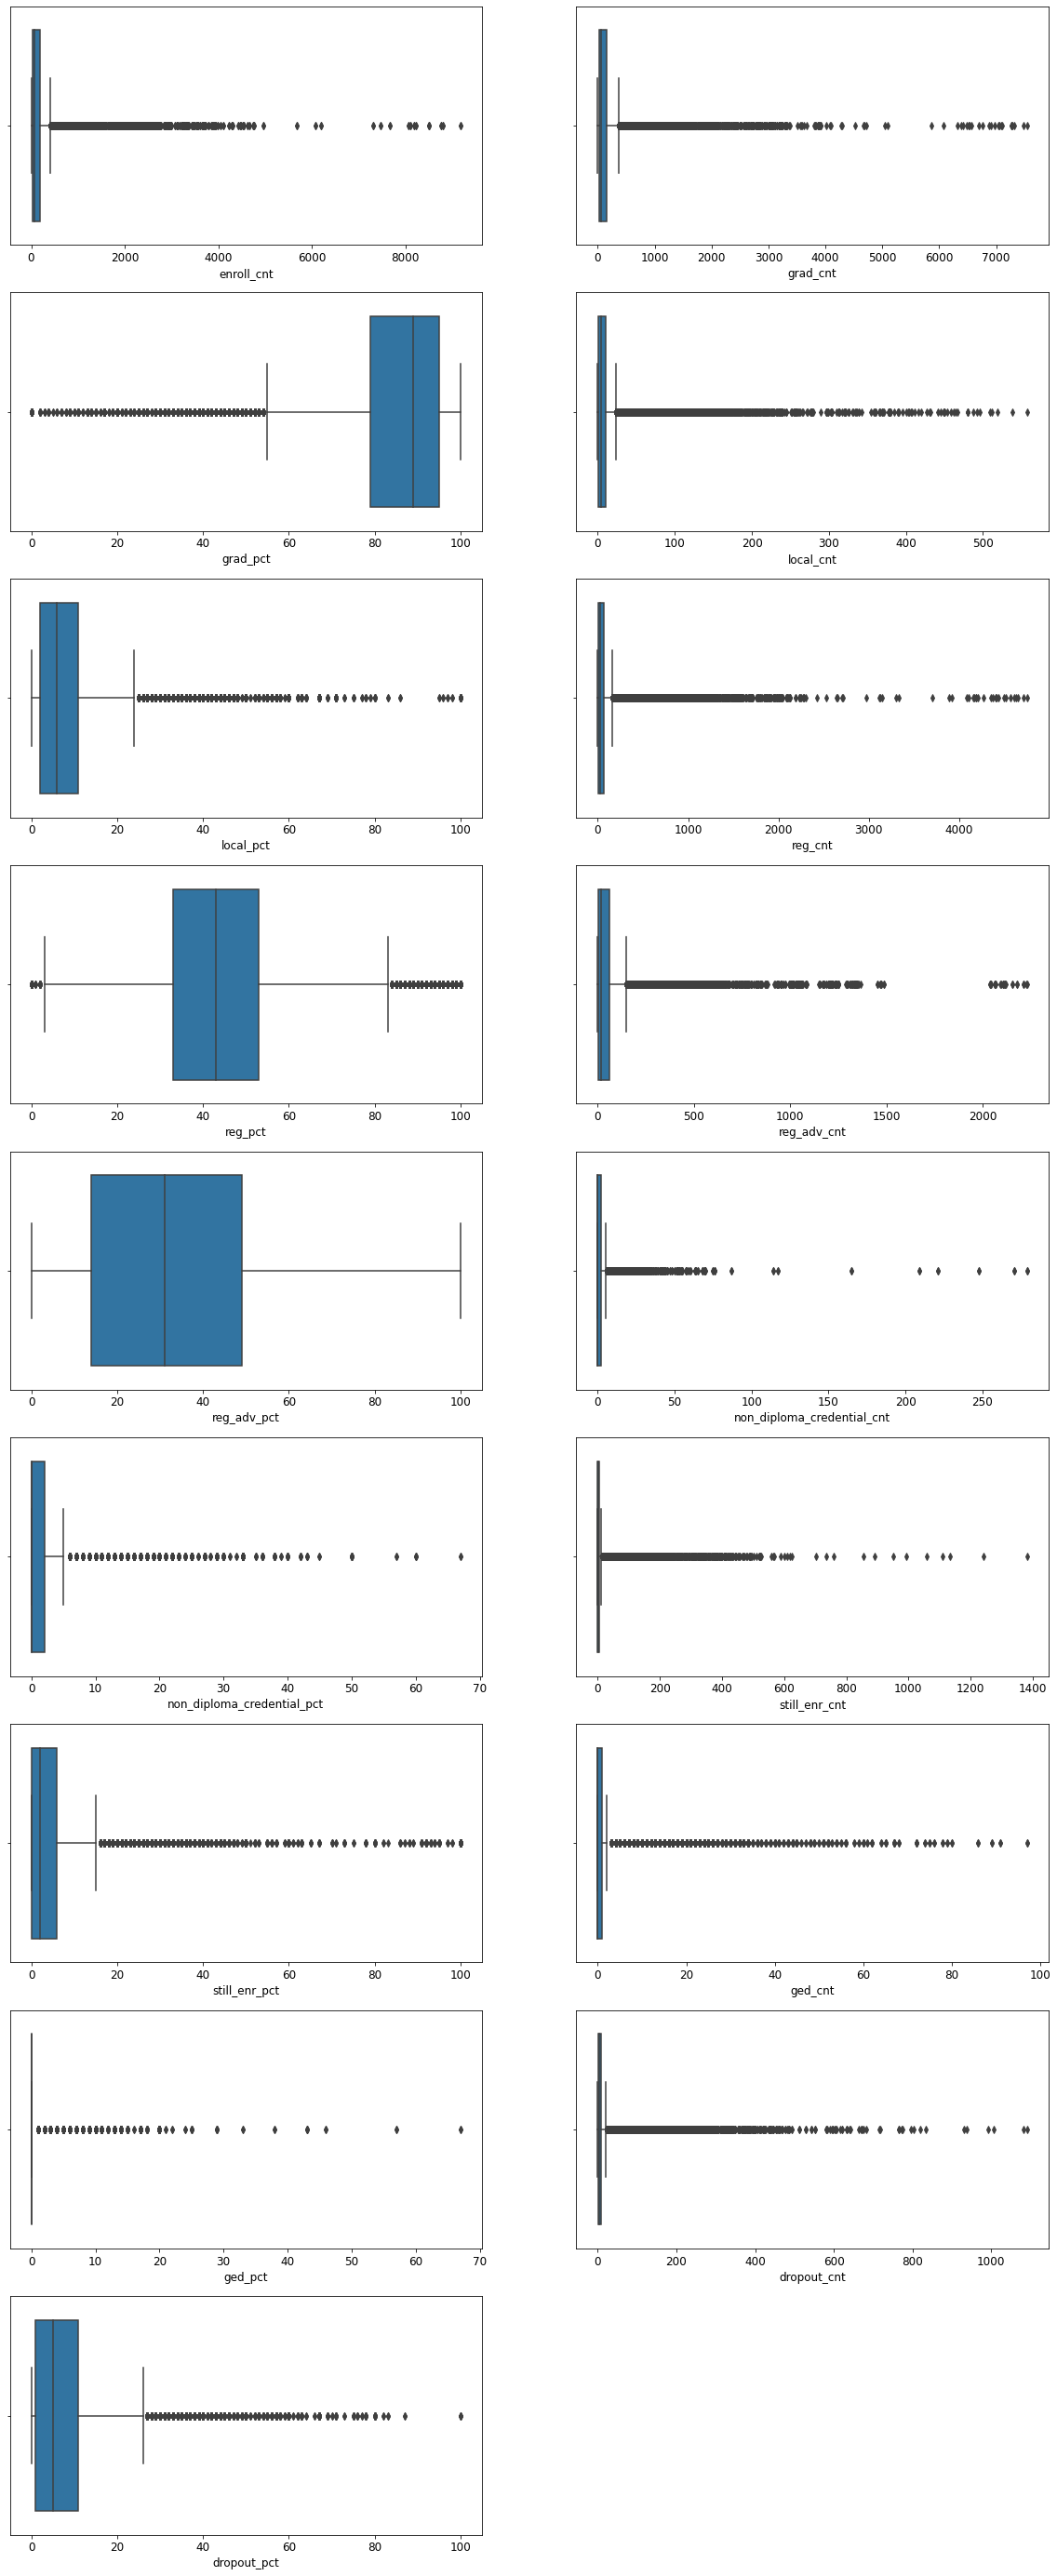

In [16]:
#Define a figure to which we will add a boxplot for each of our attributes
plt.figure(figsize=(20,50))

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numeric variable display a boxplot
for k in col_num :    
    plt.subplot(9,2,j) 
    sns.boxplot(x=k, data=df);
    j=j+1

#Show results    
plt.show()

We see that our data has a lot of outliers.  

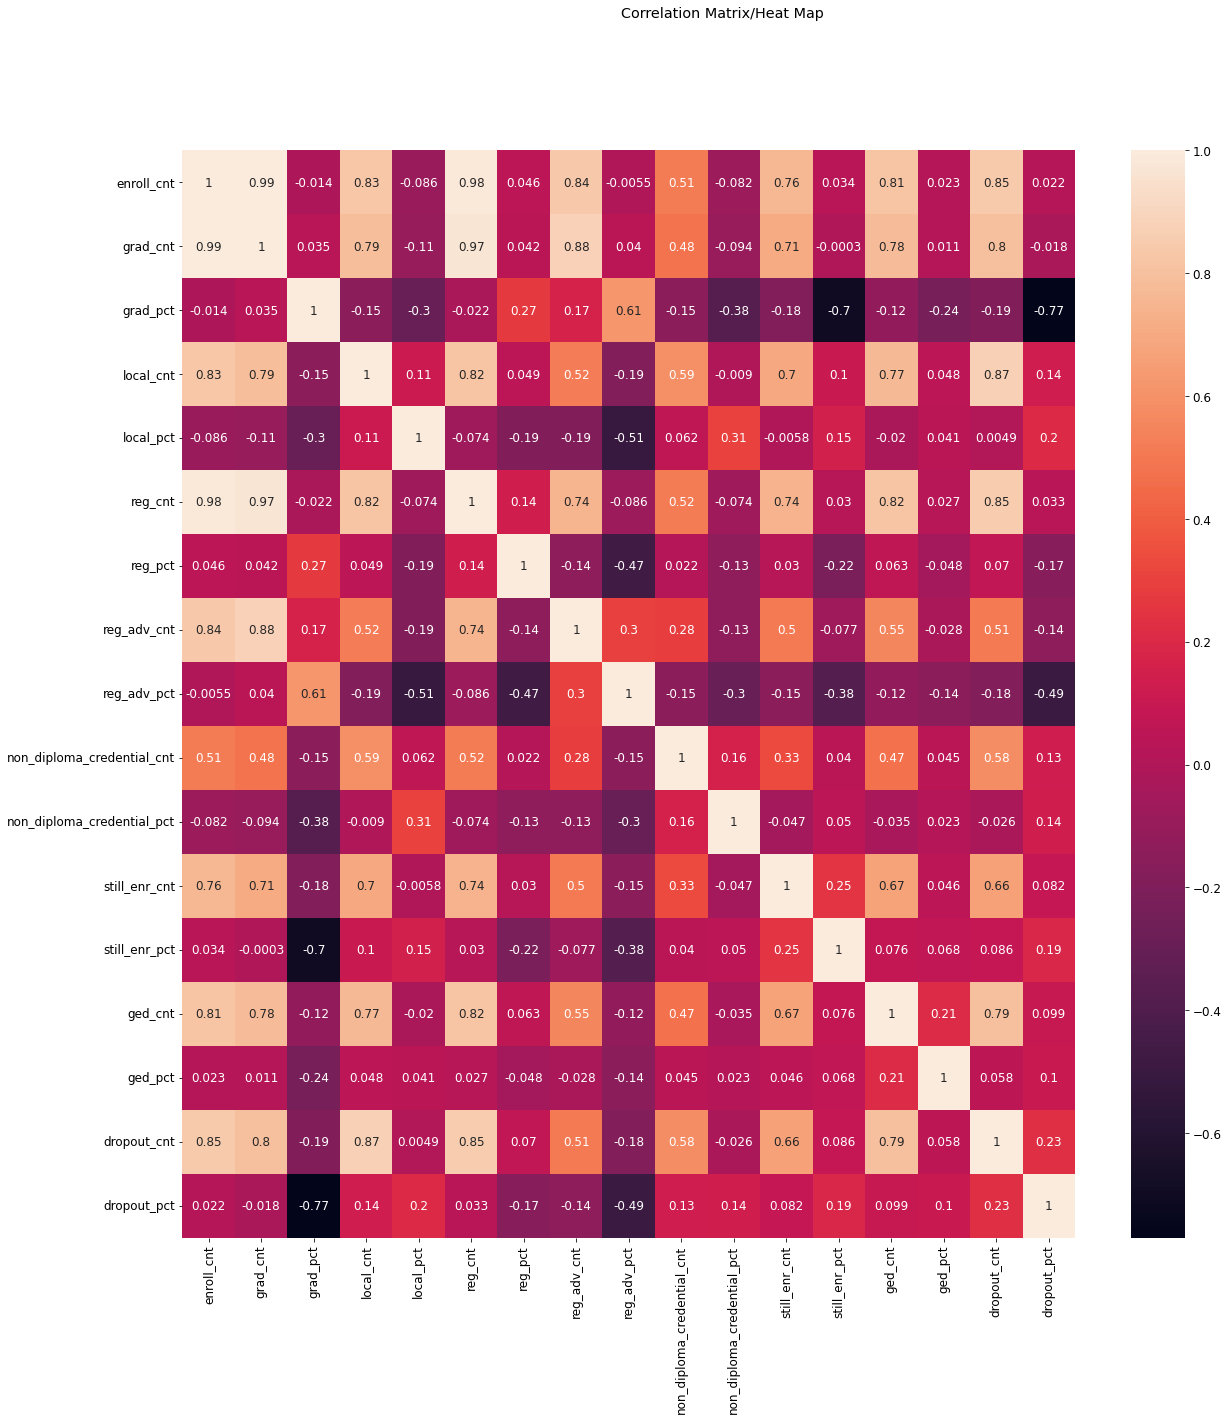

In [17]:
#Graph heat map for correlation
corr_num=df[col_num].corr()
fig = plt.figure(figsize=(20, 20))
sns.heatmap(corr_num, annot=True);
fig.suptitle('Correlation Matrix/Heat Map') 
plt.show()

1) Enroll_cnt is highly correlated with grad_cnt, local_cnt, reg_cnt, reg_adv_cnt, still_enr_cnt, ged_cnt and dropout_cnt.<br>
2) Grad_cnt is highly correlated with local_cnt, reg_cnt, reg_adv_cnt, still_enr_cnt, ged_cnt and dropout_cnt.<br>
3) Grad_pct is highly correlated with dropout_pct.<br>
4) Local_cnt is highly correlated with reg_cnt, ged_cnt and dropout_cnt.<br>
5) Reg_cnt is highly correlated with ged_cnt and dropout_cnt.<br>
6) Ged_cnt is highly correlated with dropout_cnt.<br>

<h3><b>Data Preparation</b></h3>

Create new categorical indicator variable which will be the response variable. First, find the median of dropout_pct.

In [18]:
df['dropout_pct'].median()

5.0

Add a column called 'dropout_pct_level' with 'Low' if dropout_pct is less than 1/2 the median, 'High' if dropout_pct is 1.5 times the median, and 'Medium' if dropout_pct is greater than 1/2 the median but less than 1.5 times the median.

In [19]:
numbers = df['dropout_pct']

df.loc[df['dropout_pct'] < (5/2), 'dropout_pct_level'] = 'Low' 
df.loc[df['dropout_pct'] > (5*1.5), 'dropout_pct_level'] = 'High' 
df.loc[(df['dropout_pct'] > (5/2)) & (df['dropout_pct'] < (5*1.5)), 'dropout_pct_level'] = 'Medium' 

print(df)

      report_school_year  aggregation_index aggregation_type  \
0                2018-19                  3         District   
1                2018-19                  3         District   
2                2018-19                  3         District   
3                2018-19                  3         District   
4                2018-19                  3         District   
...                  ...                ...              ...   
73147            2018-19                  3         District   
73148            2018-19                  3         District   
73149            2018-19                  3         District   
73150            2018-19                  3         District   
73151            2018-19                  3         District   

                     aggregation_name  nrc_code                   nrc_desc  \
0         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs 

Analyze the distribution of the newly created dropout_pct_level indicator value.

In [20]:
df['dropout_pct_level'].value_counts()

High      14880
Low       13315
Medium    11479
Name: dropout_pct_level, dtype: int64

We see that the three categories, Low, Medium and High, are fairly balanced.  There are 39,674 rows with a dropout_pct_level value.  Medium is ~29%, Low is ~33%, and High makes up ~38% of the total dropout_pct_level values. Once we drop the missing values in the data set, this number should match the number of rows in the dataset which we will see below.

Remove dropout_cnt and dropout_pct to eliminate the collinearity that will result from the addition of the dropout_pct_level indicator.

In [21]:
#Drop dropout_cnt and dropout_pct
df = df.drop(df.columns[[27, 28]], axis=1)

#View the data frame to ensure that the columns were removed
df.columns

Index(['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct',
       'dropout_pct_level'],
      dtype='object')

Remove rows with missing values.

In [22]:
#Drop the rows with missing values
df = df.dropna()

#Check results
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_pct_level
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47.0,91.0,14.0,16.0,2.0,30.0,5.0,0.0,0.0,High
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,52.0,47.0,15.0,2.0,1.0,11.0,3.0,0.0,0.0,High
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,42.0,44.0,13.0,14.0,4.0,19.0,6.0,0.0,0.0,High
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,50.0,23.0,6.0,10.0,3.0,18.0,5.0,0.0,0.0,High
5,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,41.0,5.0,5.0,4.0,4.0,8.0,8.0,0.0,0.0,High


In [23]:
#Find the number of rows and columns in the data set.
print(df.shape)

(39674, 28)


By removing the rows with missing values, we went from 73,152 rows to 39,674 rows.  This confirms that a dropout_pct_level value was calculated for each observation in our data set.

report_school_year, aggregation_index, and aggregation_type only have one value in each column so we will drop those three columns.

In [24]:
#Drop report_school_year, aggregation_index, and aggregation_type columns since they are non-predictive.
df = df.drop(df.columns[[0, 1, 2]], axis=1)

#View the data frame to ensure that the columns were removed
df.head()

,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,...,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_pct_level
0,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658.0,...,47.0,91.0,14.0,16.0,2.0,30.0,5.0,0.0,0.0,High
1,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324.0,...,52.0,47.0,15.0,2.0,1.0,11.0,3.0,0.0,0.0,High
2,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334.0,...,42.0,44.0,13.0,14.0,4.0,19.0,6.0,0.0,0.0,High
4,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367.0,...,50.0,23.0,6.0,10.0,3.0,18.0,5.0,0.0,0.0,High
5,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,6,Hispanic,98.0,...,41.0,5.0,5.0,4.0,4.0,8.0,8.0,0.0,0.0,High


Drop nrc_code, county_code, and subgroup_code since these categorical values have corresponding categorical names.

In [25]:
#Drop nrc_code, county_code, and subgroup_code columns since they have corresponding categorical values.
df = df.drop(df.columns[[1, 3, 7]], axis=1)

#View the data frame to ensure that the columns were removed
df.head()

,aggregation_name,nrc_desc,county_name,nyc_ind,membership_desc,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,...,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_pct_level
0,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,All Students,658.0,464.0,71.0,63.0,...,47.0,91.0,14.0,16.0,2.0,30.0,5.0,0.0,0.0,High
1,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Female,324.0,246.0,76.0,30.0,...,52.0,47.0,15.0,2.0,1.0,11.0,3.0,0.0,0.0,High
2,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Male,334.0,218.0,65.0,33.0,...,42.0,44.0,13.0,14.0,4.0,19.0,6.0,0.0,0.0,High
4,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Black,367.0,248.0,68.0,42.0,...,50.0,23.0,6.0,10.0,3.0,18.0,5.0,0.0,0.0,High
5,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Hispanic,98.0,58.0,59.0,13.0,...,41.0,5.0,5.0,4.0,4.0,8.0,8.0,0.0,0.0,High


We do not need counts and percentages for the numeric columns since they refer to the same data.  We will drop the counts columns.

In [26]:
#Drop grad_cnt, local_cnt, reg_cnt, reg_adv_cnt, non_diploma_credential_cnt, still_enr_cnt, and ged_cnt.
df = df.drop(df.columns[[7, 9, 11, 13, 15, 17, 19]], axis=1)

#View the data frame to ensure that the columns were removed
df.head()

,aggregation_name,nrc_desc,county_name,nyc_ind,membership_desc,subgroup_name,enroll_cnt,grad_pct,local_pct,reg_pct,reg_adv_pct,non_diploma_credential_pct,still_enr_pct,ged_pct,dropout_pct_level
0,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,All Students,658.0,71.0,10.0,47.0,14.0,2.0,5.0,0.0,High
1,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Female,324.0,76.0,9.0,52.0,15.0,1.0,3.0,0.0,High
2,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Male,334.0,65.0,10.0,42.0,13.0,4.0,6.0,0.0,High
4,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Black,367.0,68.0,11.0,50.0,6.0,3.0,5.0,0.0,High
5,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Hispanic,98.0,59.0,13.0,41.0,5.0,4.0,8.0,0.0,High


The subgroup_code 1 is for all students while 2 is for female and 3 is for male.  Female + Male = All Student 98% of the time in this data set so having all three listed is redundant.  We will remove the subgroup_name "All Students" from the data set.

In [27]:
#Drop subgroup_name All Students
index_names = df[(df['subgroup_name'] == "All Students")].index
df.drop(index_names, inplace = True)

#View the data frame to ensure that the rows were removed
df.head()

,aggregation_name,nrc_desc,county_name,nyc_ind,membership_desc,subgroup_name,enroll_cnt,grad_pct,local_pct,reg_pct,reg_adv_pct,non_diploma_credential_pct,still_enr_pct,ged_pct,dropout_pct_level
1,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Female,324.0,76.0,9.0,52.0,15.0,1.0,3.0,0.0,High
2,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Male,334.0,65.0,10.0,42.0,13.0,4.0,6.0,0.0,High
4,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Black,367.0,68.0,11.0,50.0,6.0,3.0,5.0,0.0,High
5,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Hispanic,98.0,59.0,13.0,41.0,5.0,4.0,8.0,0.0,High
6,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Asian/Pacific Islander,46.0,83.0,0.0,57.0,26.0,0.0,0.0,0.0,High


In [28]:
#Print the shape of the data frame
print (df.shape)

(35628, 15)


By removing subgroup_name All Students, we went from 39,674 rows to 35,628.

Create dummy variables for the categorical variables.

In [29]:
#Get dummies
cat_dum=pd.get_dummies(df.aggregation_name, drop_first = False)

#Display first 5 rows
cat_dum.head()

,ADDISON CENTRAL SCHOOL DISTRICT,ADIRONDACK CENTRAL SCHOOL DISTRICT,AFTON CENTRAL SCHOOL DISTRICT,AKRON CENTRAL SCHOOL DISTRICT,ALBANY CITY SCHOOL DISTRICT,ALBION CENTRAL SCHOOL DISTRICT,ALDEN CENTRAL SCHOOL DISTRICT,ALEXANDER CENTRAL SCHOOL DISTRICT,ALEXANDRIA CENTRAL SCHOOL DISTRICT,ALFRED-ALMOND CENTRAL SCHOOL DISTRICT,...,WILLSBORO CENTRAL SCHOOL DISTRICT,WILSON CENTRAL SCHOOL DISTRICT,WINDHAM-ASHLAND-JEWETT CENTRAL SCHOOL DISTRICT,WINDSOR CENTRAL SCHOOL DISTRICT,WORCESTER CENTRAL SCHOOL DISTRICT,WYANDANCH UNION FREE SCHOOL DISTRICT,YONKERS CITY SCHOOL DISTRICT,YORK CENTRAL SCHOOL DISTRICT,YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT,YORKTOWN CENTRAL SCHOOL DISTRICT
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#Get dummies
cat_dum2=pd.get_dummies(df.nrc_desc, drop_first = False)

#Display first 5 rows
cat_dum2.head()

,Average Needs,Buffalo Rochester Yonkers Syracuse,Low Needs,NYC,Rural High Needs,Urban-Suburban High Needs
1,0,0,0,0,0,1
2,0,0,0,0,0,1
4,0,0,0,0,0,1
5,0,0,0,0,0,1
6,0,0,0,0,0,1


In [31]:
#Get dummies
cat_dum3=pd.get_dummies(df.county_name, drop_first = False)

#Display first 5 rows
cat_dum3.head()

,ALBANY,ALLEGANY,BRONX,BROOME,CATTARAUGUS,CAYUGA,CHAUTAUQUA,CHEMUNG,CHENANGO,CLINTON,...,SULLIVAN,TIOGA,TOMPKINS,ULSTER,WARREN,WASHINGTON,WAYNE,WESTCHESTER,WYOMING,YATES
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#Get dummies
cat_dum4=pd.get_dummies(df.membership_desc, drop_first = False)

#Display first 5 rows
cat_dum4.head()

,2013 Total Cohort - 6 Year Outcome,2013 Total Cohort - 6 Year Outcome - August 2019,2014 Total Cohort - 5 Year Outcome,2014 Total Cohort - 5 Year Outcome - August 2019,2015 Total Cohort - 4 Year Outcome,2015 Total Cohort - 4 Year Outcome - August 2019
1,1,0,0,0,0,0
2,1,0,0,0,0,0
4,1,0,0,0,0,0
5,1,0,0,0,0,0
6,1,0,0,0,0,0


In [33]:
#Get dummies
cat_dum5=pd.get_dummies(df.subgroup_name, drop_first = False)

#Display first 5 rows
cat_dum5.head()

,American Indian/Alaska Native,Asian/Pacific Islander,Black,Economically Disadvantaged,English Language Learner,Female,Formerly English Language Learner,General Education Students,Hispanic,Homeless,...,Multiracial,Not Economically Disadvantaged,Not English Language Learner,Not Homeless,Not Migrant,Not in Foster Care,Parent Not in Armed Forces,Parent in Armed Forces,Students with Disabilities,White
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#Concatenate the data frame with the dummies
df2 = pd.concat([df, cat_dum, cat_dum2, cat_dum3, cat_dum4, cat_dum5], axis=1)

#Drop the columns that were converted to dummies.
df3 = df2.drop(['aggregation_name', 'nrc_desc', 'county_name', 'membership_desc', 'subgroup_name'], axis=1)

#Check results
df3.head()

,nyc_ind,enroll_cnt,grad_pct,local_pct,reg_pct,reg_adv_pct,non_diploma_credential_pct,still_enr_pct,ged_pct,dropout_pct_level,...,Multiracial,Not Economically Disadvantaged,Not English Language Learner,Not Homeless,Not Migrant,Not in Foster Care,Parent Not in Armed Forces,Parent in Armed Forces,Students with Disabilities,White
1,0,324.0,76.0,9.0,52.0,15.0,1.0,3.0,0.0,High,...,0,0,0,0,0,0,0,0,0,0
2,0,334.0,65.0,10.0,42.0,13.0,4.0,6.0,0.0,High,...,0,0,0,0,0,0,0,0,0,0
4,0,367.0,68.0,11.0,50.0,6.0,3.0,5.0,0.0,High,...,0,0,0,0,0,0,0,0,0,0
5,0,98.0,59.0,13.0,41.0,5.0,4.0,8.0,0.0,High,...,0,0,0,0,0,0,0,0,0,0
6,0,46.0,83.0,0.0,57.0,26.0,0.0,0.0,0.0,High,...,0,0,0,0,0,0,0,0,0,0


<h3><b> Prepped Data Review</h3></b>

In [35]:
#Get summary statistics including mean, standard deviation, minimum, maximum, and quartiles
df3.describe()

,nyc_ind,enroll_cnt,grad_pct,local_pct,reg_pct,reg_adv_pct,non_diploma_credential_pct,still_enr_pct,ged_pct,ADDISON CENTRAL SCHOOL DISTRICT,...,Multiracial,Not Economically Disadvantaged,Not English Language Learner,Not Homeless,Not Migrant,Not in Foster Care,Parent Not in Armed Forces,Parent in Armed Forces,Students with Disabilities,White
count,35628.000000,35628.000000,35628.000000,35628.000000,35628.000000,35628.000000,35628.000000,35628.000000,35628.000000,35628.000000,...,35628.000000,35628.000000,35628.000000,35628.000000,35628.000000,35628.000000,35628.000000,35628.000000,35628.000000,35628.000000
mean,0.089536,179.750365,84.017542,8.724009,43.342568,31.975104,1.789828,5.329488,0.621814,0.001067,...,0.019872,0.109970,0.024475,0.027001,0.000505,0.001010,0.000786,0.000786,0.101942,0.078309
std,0.285520,414.136600,16.017440,10.799236,17.372293,23.370216,4.210579,8.862534,2.021069,0.032642,...,0.139562,0.312856,0.154521,0.162089,0.022472,0.031772,0.028023,0.028023,0.302577,0.268661
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,78.000000,2.000000,33.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,60.000000,89.000000,6.000000,43.000000,30.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,166.000000,95.000000,11.000000,53.000000,49.000000,2.000000,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,8505.000000,100.000000,100.000000,100.000000,100.000000,60.000000,100.000000,67.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Divide the data frame into two lists, one for categorical variables and the other for numeric, to look at the distributions of each of the attributes. 

In [36]:
#Create lists of numerical and categorical attributes

col_cat2=df3.drop(['enroll_cnt', 'grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct', 
                   'still_enr_pct', 'ged_pct'], axis=1)

col_num2=['enroll_cnt', 'grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct','non_diploma_credential_pct', 'still_enr_pct', 
         'ged_pct']

print("# of categorical attributes:%s" %len(col_cat2.columns))
print("# of numeric attributes:%s" %len(col_num2))

# of categorical attributes:767
# of numeric attributes:8


We started with 12 categorical values and 17 numeric values, and now we have 767 categorical values and 8 numeric values.

<h4><b>Histograms and Boxplots</b></h4>

Plot a histogram for each of our numerical attributes.

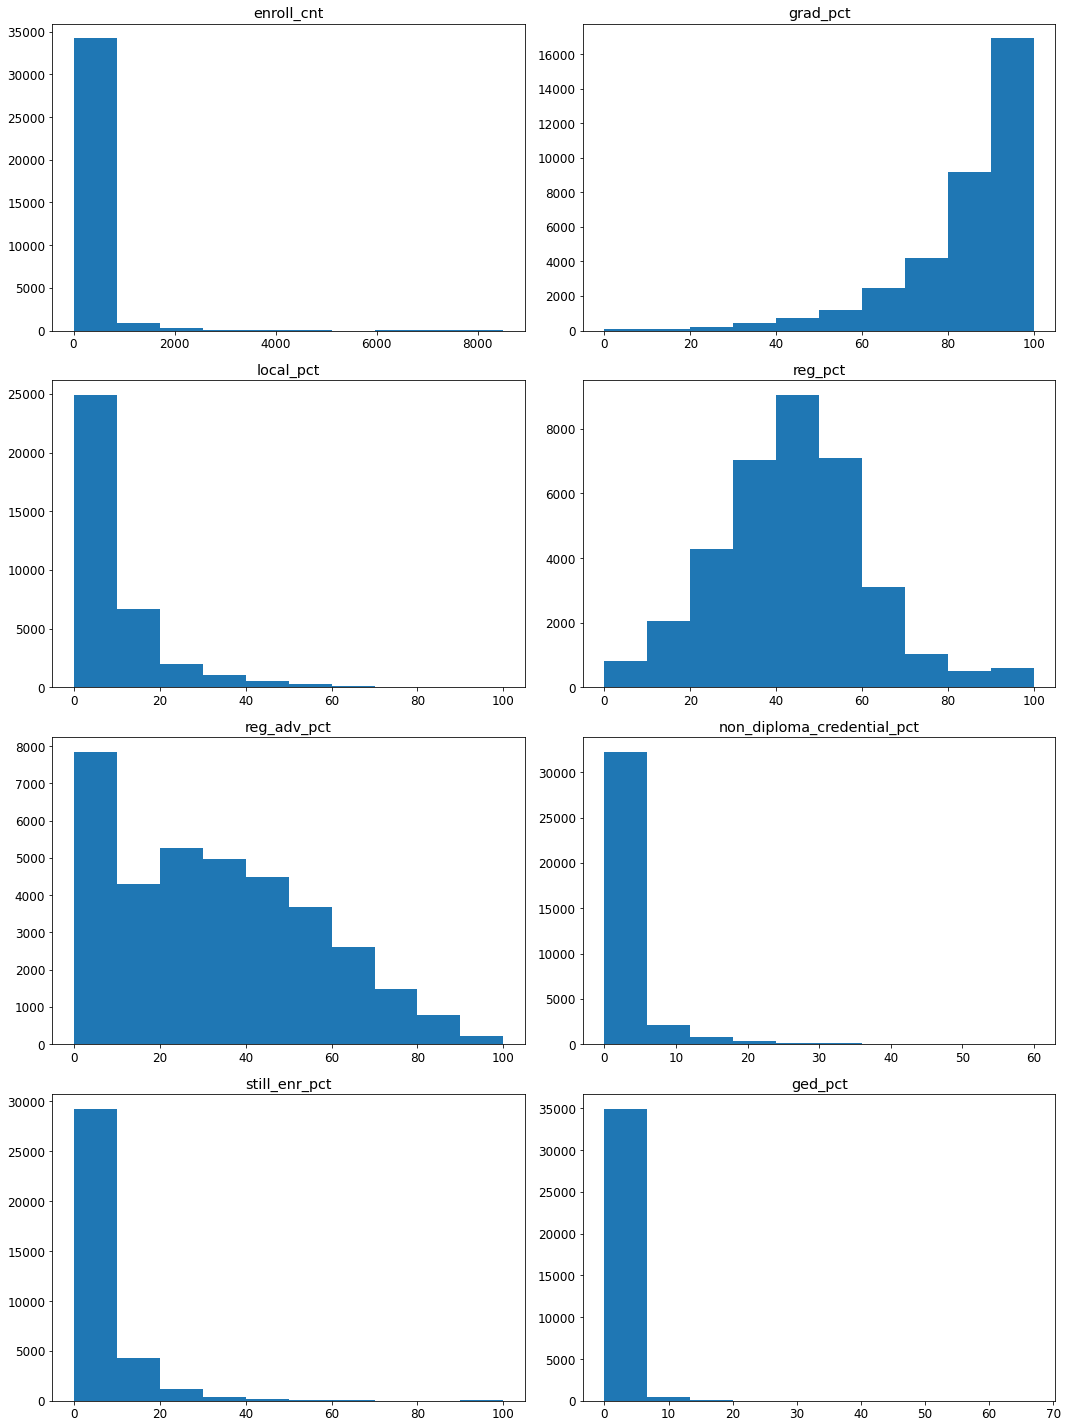

In [37]:
#Set plot parameters
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,20)}) 

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numerical column 
for k in col_num2 :   
    plt.subplot(4,2,j) 
    plt.hist(df3[k])
    plt.title('%s' %k)
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

1) enroll_cnt is right-skewed. It has 1,365 unique values with a mode of 5, a median of 60, and a mean of 180.<br>
2) grad_pct is left-skewed. It has 99 unique values with a mode of 100, a median of 89, and a mean of 84.<br>
3) local_pct is right-skewed. It has 79 unique values with a mode of 0, a median of 6,and a mean of 9.<br>
4) reg_pct is symetrical. It has 101 unique values with a mode of 50, a median of 43, and a mean of 43.<br>
5) red_adv_pct right-skewed. It has 99 unique values with a mode of 0, a median of 30, and a mean of 32. <br>
6) non_diploma_credential_pct is right-skewed. It has 45 unique values with a mode of 0, a median of 0, and a mean of 2.<br>
7) still_enr_pct right-skewed. It has 82 unique values with a mode of 0, a median of 2, and a mean of 5. <br>
8) ged_pct right-skewed. It has 30 unique values with a mode of 0, a median of 0, and a mean of 1. <br>

We will now check the boxplots for outliers.

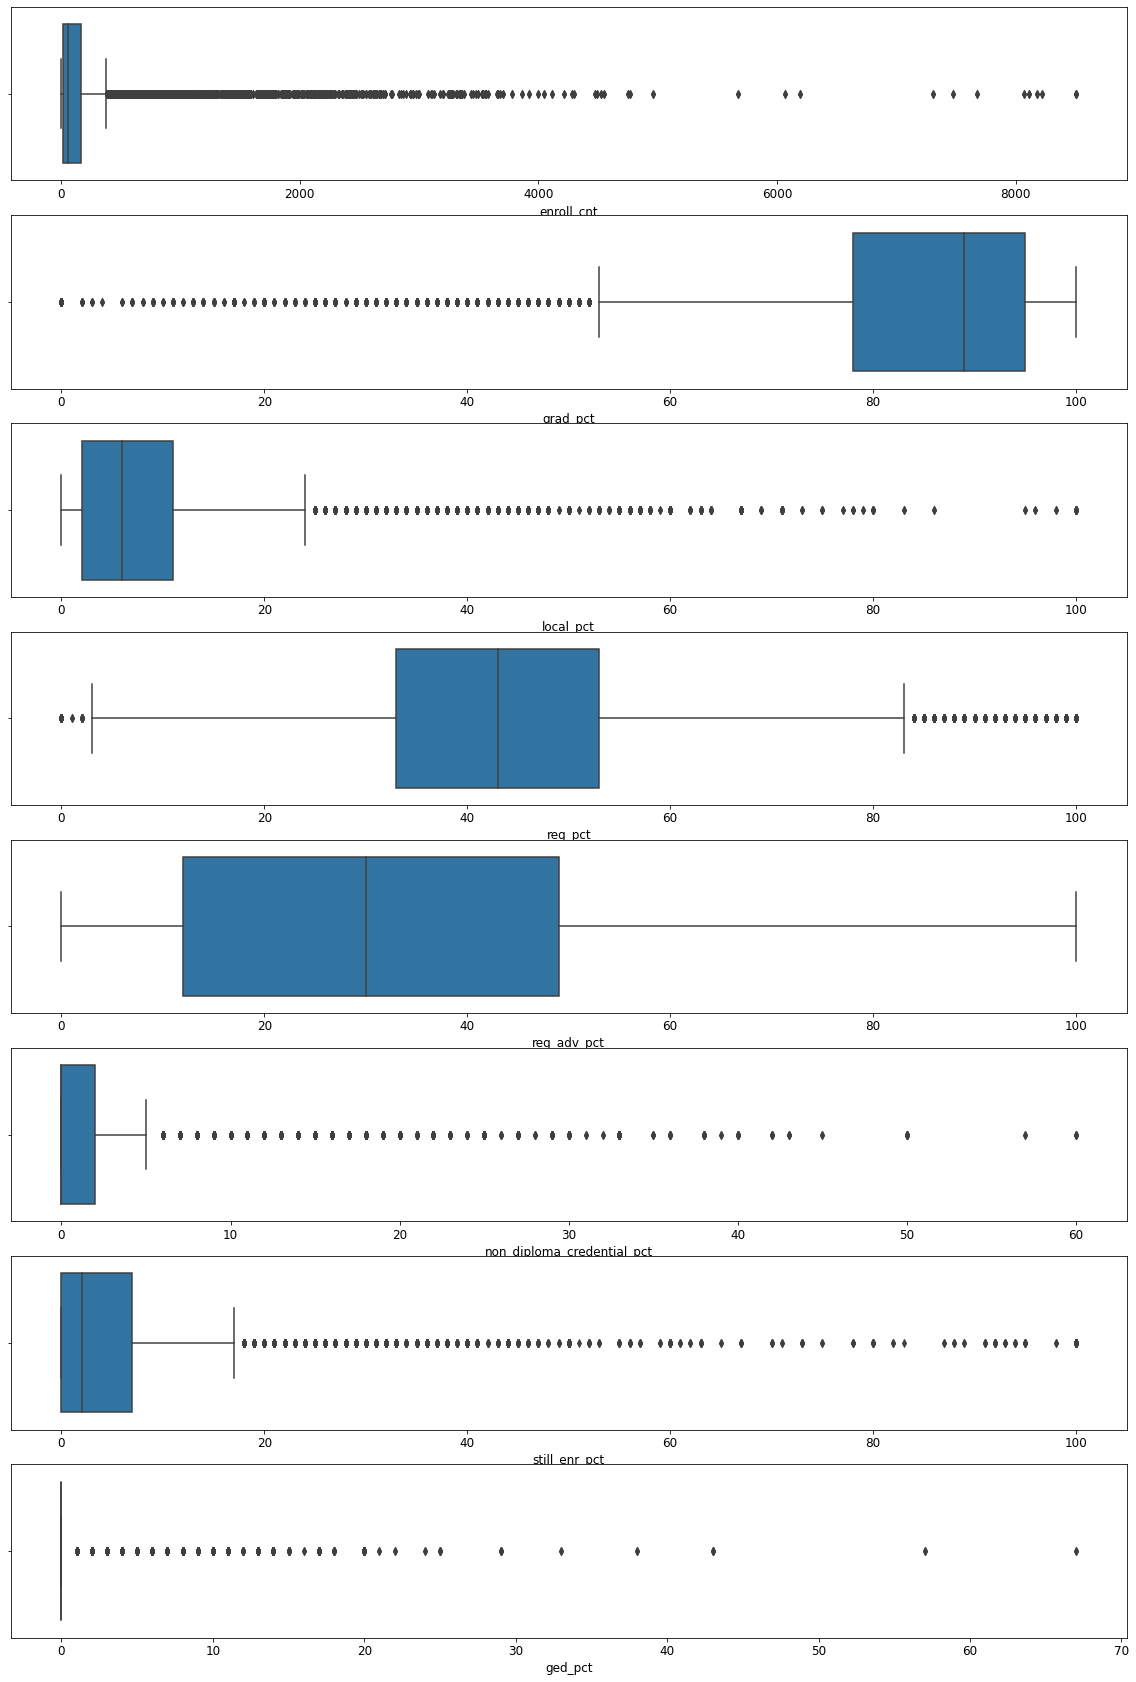

In [38]:
#Define a figure to which we will add a boxplot for each of our attributes
plt.figure(figsize=(20,30))

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numeric variable display a boxplot
for k in col_num2 :    
    plt.subplot(8,1,j) 
    sns.boxplot(x=k, data=df3);
    j=j+1

#Show results    
plt.show()

We still have a lot of outliers in our data.

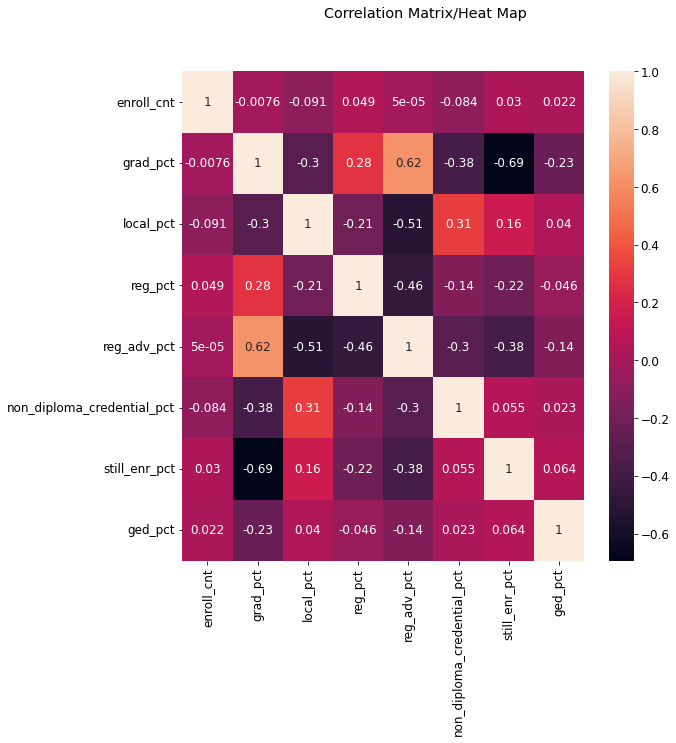

In [39]:
#Graph heat map for correlation
corr_num=df3[col_num2].corr()
fig = plt.figure(figsize=(9, 9))
sns.heatmap(corr_num, annot=True);
fig.suptitle('Correlation Matrix/Heat Map') 
plt.show()

There are no highly correlated (>0.75) variables within our numeric attributes.<br>
Grad_pct is negatively correlated with still_enr_pct (-0.69) and positively correlated with reg_adv_pct (0.62).<br>
Local_pct is negatively correlated with reg_adv_pct (-0.51).<br>
Reg_pct is negatively correlated with reg_adv_pct (-0.46).<br>

Plot the numerical values again the response variable to see the more predictive variables.

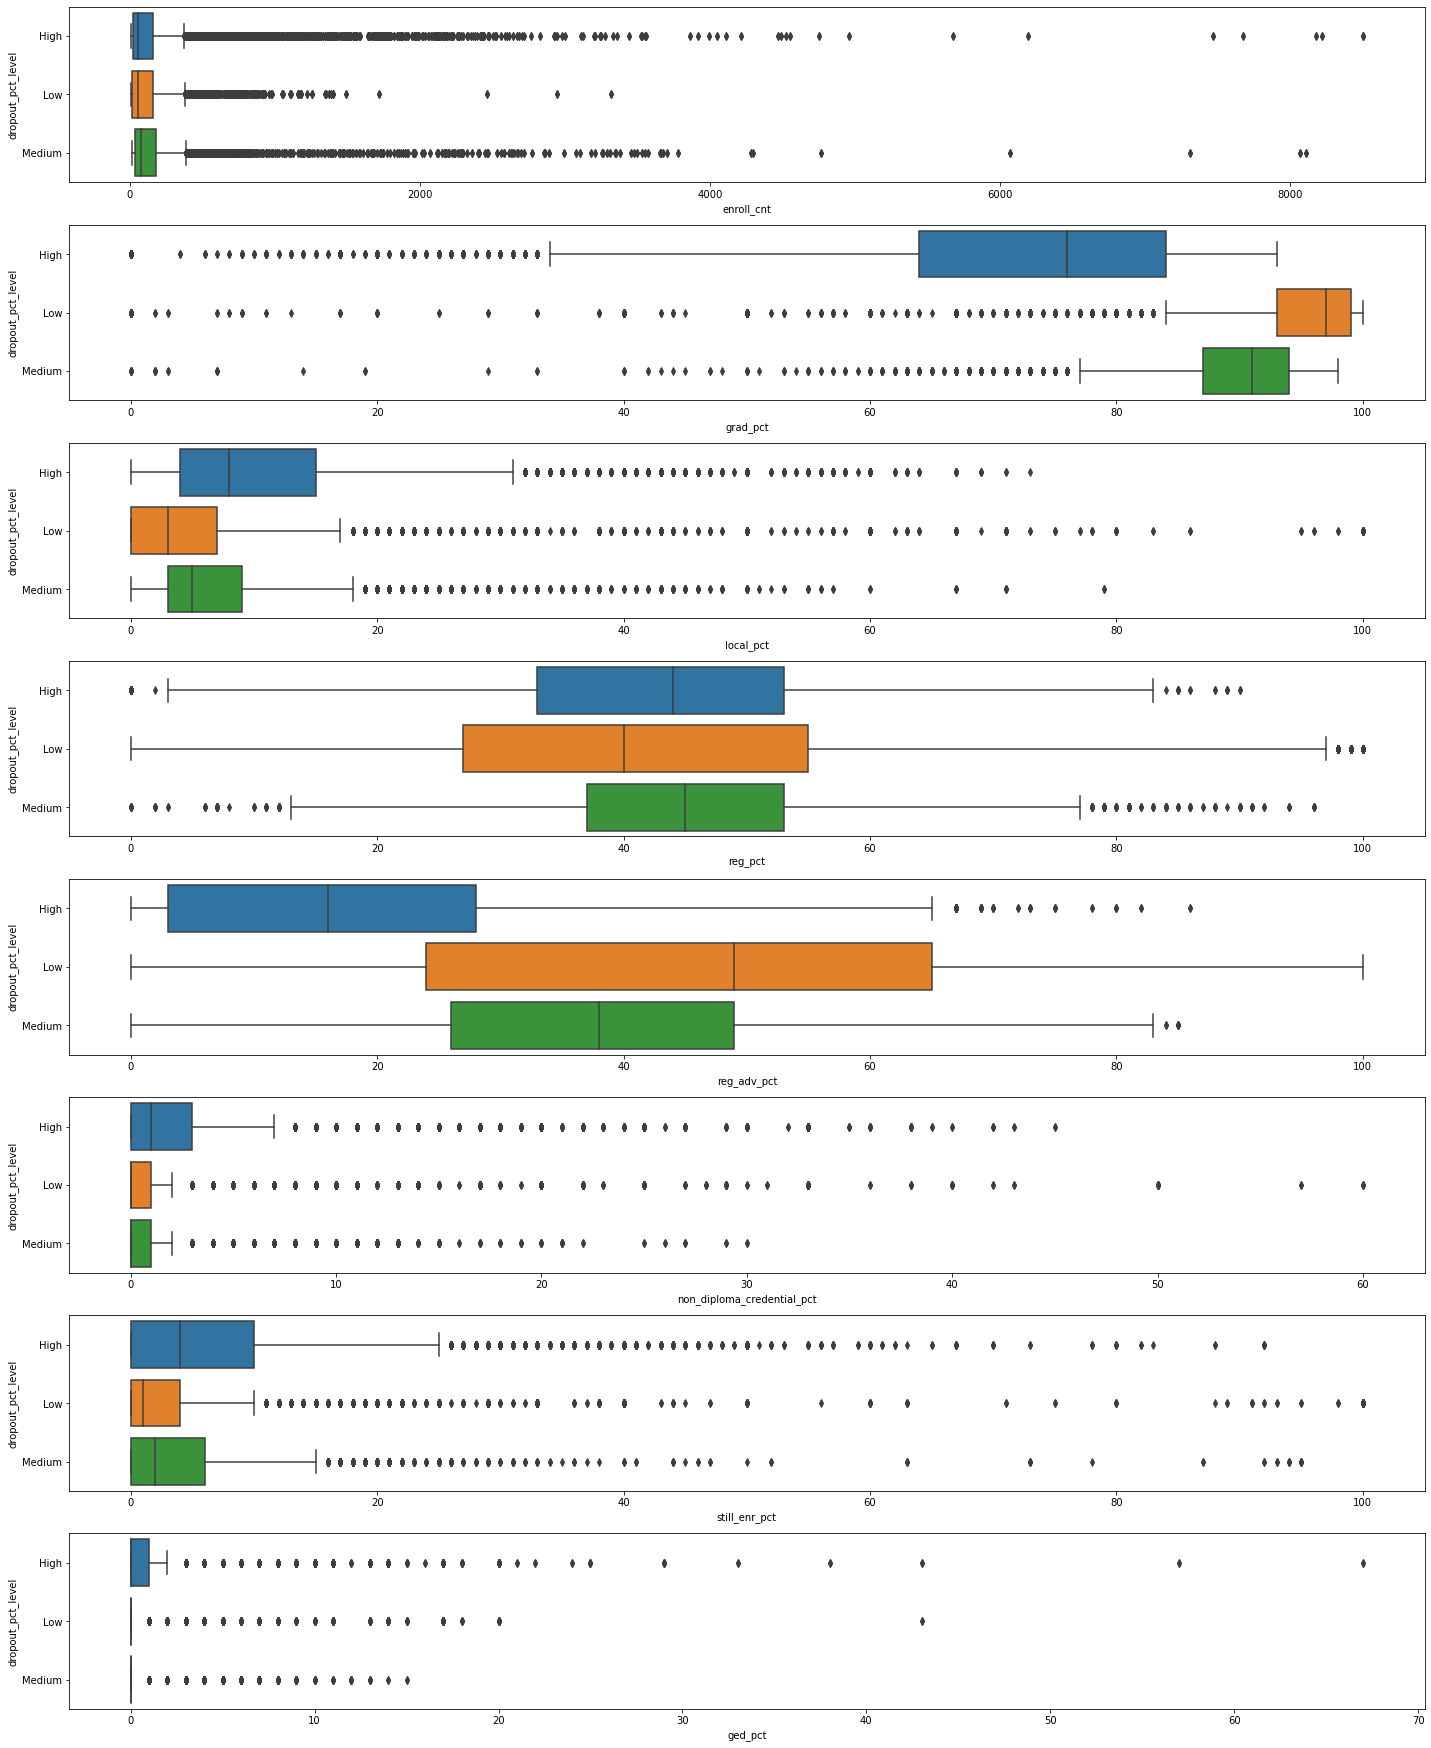

In [40]:
#Set plot parameters
plt.rcParams.update({'font.size': 10,'figure.figsize':(20,30)}) 

#Use an index to identify the spot of the subplot
j=1

#For each categorical attribute
for k in df3[col_num2].columns.to_list():    
    plt.subplot(10,1,j) 
    sns.boxplot(data=df3, x=k, y=df3['dropout_pct_level'])
    j=j+1

plt.tight_layout()

#Show results    
plt.show()

grad_pct, local_pct, reg_adv_pct, non_diploma_credential_pct, and ged_pct look like that have predictive ability for our response variable dropout_pct_level.

<h3><b>Decision Tree + Random Forest + Gradient Boosting Classifier + Stochastic Gradient Descent Classifier + XG Boost Classifier Modeling</h3></b>

Feature Importance

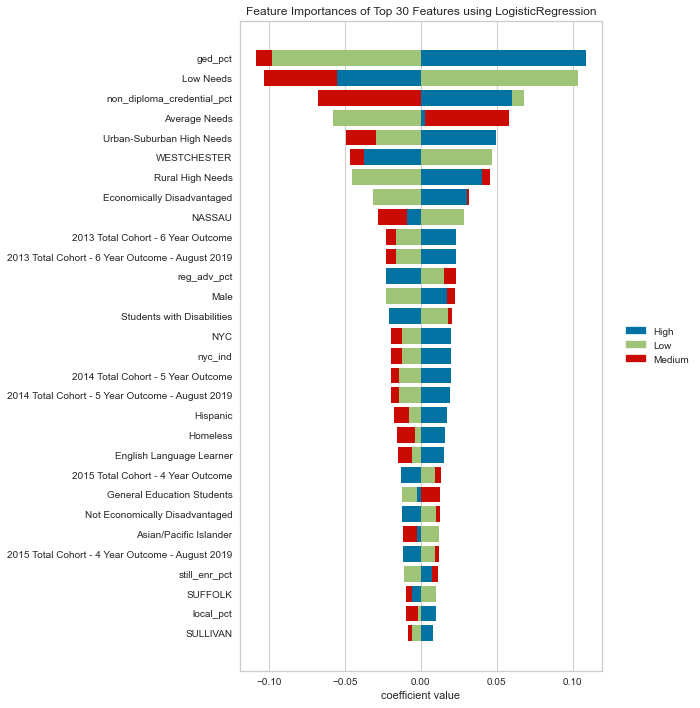

<AxesSubplot:title={'center':'Feature Importances of Top 30 Features using LogisticRegression'}, xlabel='coefficient value'>

In [41]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import LogisticRegression

X = df3.drop(['dropout_pct_level'], axis=1)
y = df3.dropout_pct_level

lr = LogisticRegression(random_state=42)
fig, ax = plt.subplots(figsize=(10, 10))
fi_viz = FeatureImportances(lr, stack=True, relative=False, topn=30)
fi_viz.fit(X, y)
fi_viz.poof()

According to yellowbrick feature importance, the 30 most important features in order of importance are as follows: 

- ged_pct
- Low Needs
- non_diploma_credential_pct
- Average Needs
- Urban-Suburban High Needs
- WESTCHESTER
- Rural High Needs
- Economically Disadvantaged
- NASSAU
- 2013 Total Cohort - 6 Year Outcome
- 2013 Total Cohort - 6 Year Outcome - August 2019
- reg_adv_pct
- Male
- Students with Disabilities
- NYC
- nyc_ind
- 2014 Total Cohort - 5 Year Outcome
- 2014 Total Cohort - 5 Year Outcome - August 2019
- Hispanic
- Homeless
- English Language Learner
- 2015 Total Cohort - 4 Year Outcome
- General Education Students
- Not Economically Disadvantaged
- Asian/Pacific Islander
- 2015 Total Cohort - 4 Year Outcome - August 2019
- still_enr_pct
- SUFFOLK
- local_pct
- SULLIVAN

Generating lists of our top predictors to use in our models

In [42]:
top30predictors = ['ged_pct', 'Low Needs', 'non_diploma_credential_pct', 'Average Needs', 'Urban-Suburban High Needs', 
                   'WESTCHESTER', 'Rural High Needs', 'Economically Disadvantaged', 'NASSAU', 
                   '2013 Total Cohort - 6 Year Outcome', '2013 Total Cohort - 6 Year Outcome - August 2019', 'reg_adv_pct', 
                   'Male', 'Students with Disabilities', 'NYC', 'nyc_ind', '2014 Total Cohort - 5 Year Outcome', 
                   '2014 Total Cohort - 5 Year Outcome - August 2019', 'Hispanic', 'Homeless', 'English Language Learner', 
                   '2015 Total Cohort - 4 Year Outcome', 'General Education Students', 'Not Economically Disadvantaged', 
                   'Asian/Pacific Islander', '2015 Total Cohort - 4 Year Outcome - August 2019', 'still_enr_pct', 'SUFFOLK',
                   'local_pct', 'SULLIVAN']

top15predictors = ['ged_pct', 'Low Needs', 'non_diploma_credential_pct', 'Average Needs', 'Urban-Suburban High Needs', 
                   'WESTCHESTER', 'Rural High Needs', 'Economically Disadvantaged', 'NASSAU', 
                   '2013 Total Cohort - 6 Year Outcome', '2013 Total Cohort - 6 Year Outcome - August 2019', 'reg_adv_pct', 
                   'Male', 'Students with Disabilities', 'NYC']

Split the data into training and testing subsets.

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score

#Prepare data for classification process
#Use 33% data to train 
#Use random state number 20 to make sure result is fixed 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

Find the optimal parameters for our decision trees.<br>
Source: https://towardsdatascience.com/understanding-decision-tree-classification-with-scikit-learn-2ddf272731bd

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [45]:
pipe_steps = [('scaler', StandardScaler()), ('decsT', DecisionTreeClassifier())]

check_params = {"decsT__criterion":['gini', 'entropy'],
               "decsT__max_depth": np.arange (3, 17)}
               
pipeline = Pipeline(pipe_steps)
print(pipeline)


Pipeline(steps=[('scaler', StandardScaler()),
                ('decsT', DecisionTreeClassifier())])


In [46]:
#from tqdm import tqdm_notebook as tqdm

#print("start fitting the data")
#import warnings
#warnings.filterwarnings("ignore")

#for cv in tqdm(range(3,6)):
    #create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
    #create_grid.fit(X_train, y_train)
    #print("score for %d fold CV : = %3.2f" %(cv, create_grid.score(X_test, y_test)))
    #print("best fit parameters from GridSearch")
    #print(create_grid.best_params_)
#print("out of the loop")

This took about 7 minutes to run with the above specifications so we have commented it out.  The results were as follows:

|    # of CV Folds    |   3  | 4       | 5      |
|:-------------------:|:----:|---------|--------|
| Score for x fold CV | 0.95 | 0.95    | 0.95   |
|      Criterion      | gini | entropy | entropy|
|      Max Depth      |  16  | 16      | 16     |

The optimal settings for our decision trees are the criterion of 'entropy' and a max_depth of 16.

As for the predictors for our models, we will try three versions of a decision tree and a random forest. The first set of models will feature our 15 best predictors as denoted by our Yellowbrick visualization. The second set of models will feature our 30 best predictors as denoted by our Yellowbrick visualization.

In [47]:
#Select variables for Model 1 (best 15 predictors)
X1_train = X_train[top15predictors]
y1_train = y_train

X1_test = X_test[top15predictors]
y1_test = y_test

#Select variables for Model 2 (best 30 predictors)
X2_train = X_train[top30predictors]
y2_train = y_train

X2_test = X_test[top30predictors]
y2_test = y_test

<h4><b>Decision Trees</b></h4>

<b> Model 1<b>

In [48]:
#Create the first decision tree and fit it to the training data
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf_dt1 = DecisionTreeClassifier(random_state=420, criterion='entropy', max_depth = 16)
clf_dt1 = clf_dt1.fit(X1_train, y1_train)

In [49]:
#Predict
pred1 = clf_dt1.predict(X1_train)

In [50]:
#Plot the tree
#plt.figure(figsize = (50, 25))
#tree.plot_tree(clf_dt1,
#         filled=True,
#         rounded=True,
#         class_names=['Low', 'Medium', 'High'],
#         feature_names=X1_train.columns);

In [51]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(clf_dt1, X1_train, y1_train, cv=10, scoring='accuracy')
print(scores1)
print(scores1.mean())

[0.63301215 0.64516129 0.66401341 0.63845832 0.65563469 0.65354001
 0.65856724 0.63720151 0.66443234 0.66778383]
0.6517804775869293


Build a multiclass confusion matrix and other classification metrics.<br>
Source: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [52]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y1_train, pred1)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y1_train, pred1, target_names=['Low', 'Medium', 'High']))

Confusion Matrix

[[7803  477  824]
 [1163 6067  929]
 [1203 1158 4246]]

Classification Report

              precision    recall  f1-score   support

         Low       0.77      0.86      0.81      9104
      Medium       0.79      0.74      0.77      8159
        High       0.71      0.64      0.67      6607

    accuracy                           0.76     23870
   macro avg       0.75      0.75      0.75     23870
weighted avg       0.76      0.76      0.76     23870



Decision Tree Model 1 has:

- an accuracy score of 76%
- a weighted average precision score of 76%
- a weighted average recall score of 76%
- a weighted average F1 score of 76%

Let's see if using the top 30 predictors will give us a better model.

<b> Model 2<b>

In [53]:
#Create second decision tree and fit it to the training data

clf_dt2 = DecisionTreeClassifier(random_state=420, criterion='entropy', max_depth = 16)
clf_dt2 = clf_dt2.fit(X2_train, y2_train)

In [54]:
#Predict
pred2 = clf_dt2.predict(X2_train)

In [55]:
#Plot the tree
#plt.figure(figsize = (50, 25))
#tree.plot_tree(clf_dt2,
#         filled=True,
#         rounded=True,
#         class_names=['Low', 'Medium', 'High'],
#         feature_names=X2_train.columns);

In [56]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(clf_dt2, X2_train, y2_train, cv=10, scoring='accuracy')
print(scores2)
print(scores2.mean())

[0.67323    0.68118978 0.67741935 0.67239212 0.69501466 0.68118978
 0.67281106 0.67281106 0.6895685  0.68873062]
0.6804356933389191


In [57]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y2_train, pred2)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y2_train, pred2, target_names=['Low', 'Medium', 'High']))

Confusion Matrix

[[8157  240  707]
 [ 626 6801  732]
 [ 843  509 5255]]

Classification Report

              precision    recall  f1-score   support

         Low       0.85      0.90      0.87      9104
      Medium       0.90      0.83      0.87      8159
        High       0.79      0.80      0.79      6607

    accuracy                           0.85     23870
   macro avg       0.84      0.84      0.84     23870
weighted avg       0.85      0.85      0.85     23870



Decision Tree Model 2 has:

- an accuracy score of 85%
- a weighted average precision score of 85%
- a weighted average recall score of 85%
- a weighted average F1 score of 85%

There was some improvement after using double the number of predictors.

<h4><b>Random Forests</b></h4>

<b> Model 1 <b>

In [58]:
#Create first random forest model and fit it to the training data
from sklearn.ensemble import RandomForestClassifier
rnd_clf1 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=420)
rnd_clf1.fit(X1_train, y1_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, random_state=420)

In [59]:
#Predict
RFpred1 = rnd_clf1.predict(X1_train)

In [60]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores3 = cross_val_score(rnd_clf1, X1_train, y1_train, cv=10, scoring='accuracy')
print(scores3)
print(scores3.mean())

[0.60284876 0.62630917 0.62295769 0.6254713  0.6300796  0.63762044
 0.63175534 0.63301215 0.63803938 0.63803938]
0.6286133221617093


In [61]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y1_train, RFpred1)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y1_train, RFpred1, target_names=['Low', 'Medium', 'High']))

Confusion Matrix

[[7566  556  982]
 [1898 4908 1353]
 [2487 1540 2580]]

Classification Report

              precision    recall  f1-score   support

         Low       0.63      0.83      0.72      9104
      Medium       0.70      0.60      0.65      8159
        High       0.52      0.39      0.45      6607

    accuracy                           0.63     23870
   macro avg       0.62      0.61      0.60     23870
weighted avg       0.63      0.63      0.62     23870



Random Forest Model 1 has:

- an accuracy score of 63%
- a weighted average precision score of 63%
- a weighted average recall score of 63%
- a weighted average F1 score of 62%

This model's performance is worse than our first decision tree featuring the same top 15 predictors.

<b> Model 2 <b>

In [62]:
#Create second random forest model and fit it to the training data
from sklearn.ensemble import RandomForestClassifier
rnd_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=420)
rnd_clf2.fit(X2_train, y2_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, random_state=420)

In [63]:
#Predict
RFpred2 = rnd_clf2.predict(X2_train)

In [64]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores4 = cross_val_score(rnd_clf2, X2_train, y2_train, cv=10, scoring='accuracy')
print(scores4)
print(scores4.mean())

[0.61834939 0.62672811 0.6254713  0.63301215 0.6418098  0.640553
 0.62966066 0.64139087 0.64516129 0.64264767]
0.6344784248010055


In [65]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y2_train, RFpred2)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y2_train, RFpred2, target_names=['Low', 'Medium', 'High']))

Confusion Matrix

[[7663  544  897]
 [1968 5079 1112]
 [2492 1656 2459]]

Classification Report

              precision    recall  f1-score   support

         Low       0.63      0.84      0.72      9104
      Medium       0.70      0.62      0.66      8159
        High       0.55      0.37      0.44      6607

    accuracy                           0.64     23870
   macro avg       0.63      0.61      0.61     23870
weighted avg       0.63      0.64      0.62     23870



Random Forest Model 2 has:

- an accuracy score of 64%
- a weighted average precision score of 63%
- a weighted average recall score of 64%
- a weighted average F1 score of 62%

This model only performs about the same as our first random forest model.

<h4><b>Gradient Boosting Classifier</b></h4>

Find the optimal parameters for learning rate and n_estimators.<br>
Source: https://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

#p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750]}

#tuning = GridSearchCV(estimator=GradientBoostingClassifier(max_features='sqrt', random_state=10), 
#            param_grid = p_test3, scoring='accuracy',n_jobs=4,refit=False, cv=5)

#tuning.fit(X_train,y_train)
#tuning.cv_results_, tuning.best_params_, tuning.best_score_

The above cell took a long time to run so it has been commented out.  The results of the optimization is to use a learning rate of 0.15 and n_estimators of 750. 

Find the optimal parameter for max_depth.

In [67]:
#p_test2 = {'max_depth':[2,3,4,5,6,7] }
#tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.15,n_estimators=750, max_features='sqrt', 
#                                                            random_state=10), 
#            param_grid = p_test2, scoring='accuracy',n_jobs=4,refit=False, cv=5)
#tuning.fit(X_train,y_train)
#tuning.cv_results_, tuning.best_params_, tuning.best_score_

The about cell took a long time to run so it has been commented out.  The optimal parameter for max_depth is 7.  We will see how our models preform with these three parameters and then optimize additional parameters if necessary. 

<b> Model 1 <b>

In [68]:
#Create first gradient boosting classifier and fit it to the training data
gbc1 = GradientBoostingClassifier(learning_rate=0.15, n_estimators=750, max_depth=7, max_features='sqrt', random_state=10)
gbc1.fit(X1_train, y1_train)

GradientBoostingClassifier(learning_rate=0.15, max_depth=7, max_features='sqrt',
                           n_estimators=750, random_state=10)

In [69]:
#Predict
gbcpred1 = gbc1.predict(X1_train)

In [70]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores5 = cross_val_score(gbc1, X1_train, y1_train, cv=10, scoring='accuracy')
print(scores5)
print(scores5.mean())

[0.64725597 0.6568915  0.66778383 0.65144533 0.67239212 0.66694596
 0.66568915 0.65563469 0.68873062 0.67239212]
0.664516129032258


In [71]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y1_train, gbcpred1)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y1_train, gbcpred1, target_names=['Low', 'Medium', 'High']))

Confusion Matrix

[[7817  468  819]
 [ 912 6187 1060]
 [ 838  943 4826]]

Classification Report

              precision    recall  f1-score   support

         Low       0.82      0.86      0.84      9104
      Medium       0.81      0.76      0.79      8159
        High       0.72      0.73      0.73      6607

    accuracy                           0.79     23870
   macro avg       0.78      0.78      0.78     23870
weighted avg       0.79      0.79      0.79     23870



Gradient Boosting Classifier 1 has:

- an accuracy score of 79%
- a weighted average precision score of 79%
- a weighted average recall score of 79%
- a weighted average F1 score of 79%

<b> Model 2 <b>

In [72]:
#Create second gradient boosting classifier and fit it to the training data
gbc2 = GradientBoostingClassifier(learning_rate=0.15, n_estimators=750, max_depth=7, max_features='sqrt', random_state=10)
gbc2.fit(X2_train, y2_train)

GradientBoostingClassifier(learning_rate=0.15, max_depth=7, max_features='sqrt',
                           n_estimators=750, random_state=10)

In [73]:
#Predict
gbcpred2 = gbc2.predict(X2_train)

In [74]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores6 = cross_val_score(gbc2, X2_train, y2_train, cv=10, scoring='accuracy')
print(scores6)
print(scores6.mean())

[0.7222455  0.71051529 0.71805614 0.71596146 0.72140762 0.71428571
 0.71135316 0.72266443 0.71973188 0.72434018]
0.7180561374109762


In [75]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y2_train, gbcpred2)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y2_train, gbcpred2, target_names=['Low', 'Medium', 'High']))

Confusion Matrix

[[8716  149  239]
 [ 174 7632  353]
 [ 145  186 6276]]

Classification Report

              precision    recall  f1-score   support

         Low       0.96      0.96      0.96      9104
      Medium       0.96      0.94      0.95      8159
        High       0.91      0.95      0.93      6607

    accuracy                           0.95     23870
   macro avg       0.95      0.95      0.95     23870
weighted avg       0.95      0.95      0.95     23870



Gradient Boosting Classifier 2 has:

- an accuracy score of 95%
- a weighted average precision score of 95%
- a weighted average recall score of 95%
- a weighted average F1 score of 95%

<h4><b>Stochastic Gradient Descent Classifiers</b></h4>

Find the optimal parameters<br>
Source: https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624

In [1]:
#Optimize parameters for Stochastic Gradient Descent Classifier
#from sklearn.linear_model import SGDClassifier

#loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
#penalty = ['l1', 'l2', 'elasticnet']
#alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
#learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
#eta0 = [1, 10, 100]

#param_grid = dict(loss=loss,
#                  penalty=penalty,
#                  alpha=alpha,
#                  learning_rate=learning_rate,
#                  eta0=eta0)

#tuning1 = GridSearchCV(estimator=SGDClassifier(),
#                           param_grid=param_grid,
#                           scoring='roc_auc',
#                           n_jobs=4,refit=False, cv=5)

#tuning1_result = tuning1.fit(X_train, y_train)

#best_score = tuning1_result.best_score_

#print('Best Score: ', tuning1_result.best_score_)
#print('Best Params: ', tuning1_result.best_params_)

The optimization took a long time to run so we have commented it out.  The results are as follows:<br>
Fitting 5 folds for each of 5 candidates, totaling 25 fits<br>
Best Params:  {'penalty': 'l2', 'loss': 'log', 'learning_rate': 'optimal', 'eta0': 100, 'alpha': 0.001}<br>

<b> Model 1 <b>

In [148]:
#Create first stochastic gradient descent classifier and fit it to the training data using our ideal parameters.
from sklearn.linear_model import SGDClassifier

SGDC1 = SGDClassifier(penalty='l2',
                      loss='log',
                      learning_rate='optimal',
                      eta0=100,
                      alpha=0.001,
                      random_state=10)

SGDC1.fit(X1_train, y1_train)

SGDClassifier(alpha=0.001, eta0=100, loss='log', random_state=10)

In [149]:
#Predict
SGDCpred1 = SGDC1.predict(X1_train)

In [150]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores7 = cross_val_score(SGDC1, X1_train, y1_train, cv=10, scoring='accuracy')
print(scores7)
print(scores7.mean())

[0.57017176 0.58986175 0.57268538 0.59447005 0.60494344 0.60787599
 0.59237537 0.58776707 0.5974026  0.60745706]
0.592501047339757


In [151]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y1_train, SGDCpred1)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y1_train, SGDCpred1, target_names=['Low', 'Medium', 'High']))

Confusion Matrix

[[8262  339  503]
 [2491 3409 2259]
 [3670  776 2161]]

Classification Report

              precision    recall  f1-score   support

         Low       0.57      0.91      0.70      9104
      Medium       0.75      0.42      0.54      8159
        High       0.44      0.33      0.37      6607

    accuracy                           0.58     23870
   macro avg       0.59      0.55      0.54     23870
weighted avg       0.60      0.58      0.56     23870



Stochastic Gradient Descent Classifier 1 has:

- an accuracy score of 58%
- a weighted average precision score of 60%
- a weighted average recall score of 58%
- a weighted average F1 score of 56%

<b> Model 2 <b>

In [153]:
#Create second stochastic gradient descent classifier and fit it to the training data using our ideal parameters.
SGDC2 = SGDClassifier(penalty='l2',
                      loss='log',
                      learning_rate='optimal',
                      eta0=100,
                      alpha=0.001,
                      random_state=420)
SGDC2.fit(X2_train, y2_train)

SGDClassifier(alpha=0.001, eta0=100, loss='log', random_state=420)

In [154]:
#Predict
SGDCpred2 = SGDC2.predict(X2_train)

In [155]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores8 = cross_val_score(SGDC2, X2_train, y2_train, cv=10, scoring='accuracy')
print(scores8)
print(scores8.mean())

[0.59907834 0.60871387 0.58357771 0.5974026  0.60494344 0.62505237
 0.59991621 0.60159196 0.6137411  0.6359447 ]
0.6069962295768747


In [156]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y2_train, SGDCpred2)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y2_train, SGDCpred2, target_names=['Low', 'Medium', 'High']))

Confusion Matrix

[[6640 1233 1231]
 [1221 5960  978]
 [1469 3128 2010]]

Classification Report

              precision    recall  f1-score   support

         Low       0.71      0.73      0.72      9104
      Medium       0.58      0.73      0.65      8159
        High       0.48      0.30      0.37      6607

    accuracy                           0.61     23870
   macro avg       0.59      0.59      0.58     23870
weighted avg       0.60      0.61      0.60     23870



Stochastic Gradient Descent Classifier 2 has:

- an accuracy score of 61%
- a weighted average precision score of 60%
- a weighted average recall score of 61%
- a weighted average F1 score of 60%

<h4><b>XG Boost Classifier</b></h4>

Find the optimal parameters

In [85]:
#https://gist.github.com/wrwr/3f6b66bf4ee01bf48be965f60d14454d
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

#import xgboost as xgb

#param_grid = {
        #'silent': [False],
        #'max_depth': [6, 10, 15, 20],
        #'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        #'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        #'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        #'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        #'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        #'gamma': [0, 0.25, 0.5, 1.0],
        #'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        #'n_estimators': [100]}

#best_xgb = GridSearchCV(xgb.XGBClassifier(), param_grid, scoring='accuracy',
                            #n_jobs=4, refit=False, cv=2)

#best_xgb.fit(X_train, y_train)

#best_score = best_xgb.best_score_
#best_params = best_xgb.best_params_
#print("Best score: {}".format(best_score))
#print("Best params: ")
#for param_name in sorted(best_params.keys()):
    #print('%s: %r' % (param_name, best_params[param_name]))

This took about 57 minutes to run with the above specifications so we have commented it out.  The results were as follows:

| Best params        |       |   |   |   |
|--------------------|-------|---|---|---|
| colsample_bylevel: | 0.7   |   |   |   |
| colsample_bytree:  | 0.9   |   |   |   |
| gamma:             | 0     |   |   |   |
| learning_rate:     | 0.1   |   |   |   |
| max_depth:         | 15    |   |   |   |
| min_child_weight   | 3.0   |   |   |   |
| n_estimators:      | 100   |   |   |   |
| reg_lambda:        | 1.0   |   |   |   |
| silent:            | False |   |   |   |
| subsample:         | 0.8   |   |   |   |

<b> Model 1 <b>

In [158]:
#Create first XGBoost Classifier and fit it to the training data using our ideal parameters.
import xgboost as xgb

xgb_clf1 = xgb.XGBClassifier(colsample_bylevel=0.7,
colsample_bytree=0.9,
gamma=0,
learning_rate=0.1,
max_depth=15,
min_child_weight=3.0,
n_estimators=100,
reg_lambda=1.0,
silent=False,
subsample=0.8,
random_state = 10)

xgb_clf1.fit(X1_train, y1_train)

[23:14:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:14:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=3.0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=None, silent=False,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [159]:
#predict
xgb_clf1_pred = xgb_clf1.predict(X1_train)
xgb_clf1_pred

array(['Low', 'Medium', 'High', ..., 'High', 'High', 'Medium'],
      dtype=object)

In [160]:
from sklearn.model_selection import cross_val_score
scores9 = cross_val_score(xgb_clf1, X1_train, y1_train, cv=10, scoring='accuracy')
print(scores9)
print(scores9.mean())

[23:14:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:14:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down t

In [161]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y1_train, xgb_clf1_pred)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y1_train, xgb_clf1_pred, target_names=['Low', 'Medium', 'High']))

Confusion Matrix

[[7733  531  840]
 [1032 6084 1043]
 [1012 1077 4518]]

Classification Report

              precision    recall  f1-score   support

         Low       0.79      0.85      0.82      9104
      Medium       0.79      0.75      0.77      8159
        High       0.71      0.68      0.69      6607

    accuracy                           0.77     23870
   macro avg       0.76      0.76      0.76     23870
weighted avg       0.77      0.77      0.77     23870



XG Boost Classifier 1 has:

- an accuracy score of 77%
- a weighted average precision score of 77%
- a weighted average recall score of 77%
- a weighted average F1 score of 77%

<b> Model 2 <b>

In [162]:
#Create second XGBoost Classifier and fit it to the training data using our ideal parameters.
xgb_clf2 = xgb.XGBClassifier(colsample_bylevel=0.7,
colsample_bytree=0.9,
gamma=0,
learning_rate=0.1,
max_depth=15,
min_child_weight=3.0,
n_estimators=100,
reg_lambda=1.0,
silent=False,
subsample=0.8,
random_state = 10)

xgb_clf2.fit(X2_train, y2_train)

[23:16:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:16:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=3.0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=None, silent=False,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [163]:
#predict
xgb_clf2_pred = xgb_clf2.predict(X2_train)
xgb_clf2_pred

array(['Low', 'Medium', 'High', ..., 'High', 'High', 'Low'], dtype=object)

In [164]:
from sklearn.model_selection import cross_val_score
scores10 = cross_val_score(xgb_clf2, X2_train, y2_train, cv=10, scoring='accuracy')
print(scores10)
print(scores10.mean())

[23:16:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:16:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:16:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down t

In [165]:
#Import confusion matrix

confusion = confusion_matrix(y2_train, xgb_clf2_pred)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y2_train, xgb_clf2_pred, target_names=['Low', 'Medium', 'High']))

Confusion Matrix

[[8571  191  342]
 [ 339 7345  475]
 [ 314  324 5969]]

Classification Report

              precision    recall  f1-score   support

         Low       0.93      0.94      0.94      9104
      Medium       0.93      0.90      0.92      8159
        High       0.88      0.90      0.89      6607

    accuracy                           0.92     23870
   macro avg       0.91      0.92      0.91     23870
weighted avg       0.92      0.92      0.92     23870



XG Boost Classifier 2 has:

- an accuracy score of 92%
- a weighted average precision score of 92%
- a weighted average recall score of 92%
- a weighted average F1 score of 92%

A summary of all the models' performance can be seen below.

| Metrics                    |DT 1 |DT 2 |RF 1 |RF 2 |GBC 1|GBC 2|SGDC 1|SGDC 2|XGBC 1|XGBC 2| 
|----------------------------|-----|-----|-----|-----|-----|-----|------|------|------|------|
| # of Variables             |15   |30   |15   |30   |15   |30   | 15   |30    |15    |30    |
| Avg Cross Validation Score |0.65 |0.68 |0.63 |0.63 |0.66 | 0.72| 0.59 |0.61  |0.66  |0.73  |
| Weighted Accuracy          |0.76 |0.85 |0.63 |0.64 |0.79 | 0.95| 0.58 |0.61  |0.77  |0.92  |
| Weighted Precision         |0.76 |0.85 |0.63 |0.63 |0.79 | 0.95| 0.60 |0.60  |0.77  |0.92  |
| Weighted Recall            |0.76 |0.85 |0.63 |0.64 |0.79 | 0.95| 0.58 |0.61  |0.77  |0.92  |
| Weighted F1 Score          |0.76 |0.85 |0.62 |0.62 |0.79 | 0.95| 0.56 |0.60  |0.77  |0.92  |

<b><h2>Select Models</h2></b>

We will apply the testing data to Gradient Boosting Classifier Model 2 since it has the highest accuracy, precision, recall, and F1 score across all models.

In [94]:
#Predict values using test data and second Gradient Boosting Classifier model.
predsm = gbc2.predict(X2_test)

In [95]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y2_test, predsm)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y2_test, predsm, target_names=['Low', 'Medium', 'High']))

Confusion Matrix

[[3604  383  557]
 [ 440 2911  607]
 [ 639  604 2013]]

Classification Report

              precision    recall  f1-score   support

         Low       0.77      0.79      0.78      4544
      Medium       0.75      0.74      0.74      3958
        High       0.63      0.62      0.63      3256

    accuracy                           0.73     11758
   macro avg       0.72      0.72      0.72     11758
weighted avg       0.72      0.73      0.72     11758



Our test data applied to Gradient Boosting Classifier Model 2 has:

- an accuracy score of 73%
- a weighted average precision score of 72%
- a weighted average recall score of 73%
- a weighted average F1 score of 72%

This model did well on our testing data.  We would expect the testing data metrics to be less than the training data metrics for this model.

| Metrics           |GBC2 - Train|GBC2 - Test|
|-------------------|------------|-----------|
| Max Depth         |7           |7          |
| Weighted Accuracy |0.95        |0.73       |
| Weighted Precision|0.95        |0.72       |
| Weighted Recall   |0.95        |0.73       |
| Weighted F1 Score |0.95        |0.72       |

<h2><b>Conclusion</h2></b>

After preparing our data, we found the best results came from Gradient Boosting Classifier model 2 which utilized 30 top predictors optimized at a learning rate of 0.15, n_estimators of 750, and a max_depth of 7.  

The training data produced an accuracy, precision, recall, and F1 score of 95%. Gradient Boosting Classifier model 2 did fairly well at predicting which categorical values (low, medium, high) is most likely to apply to a given observation. 

When it was applied to the previously unseen testing data, it had an accuracy of 73%, precision of 72%, recall of 73%, and an F1 score of 72%.